In [22]:
import pandas as pd
import numpy as np
import re

In [23]:
df = pd.read_csv("wedding_dress_analysis_FINAL.csv", low_memory=False)

In [24]:
df

,date,year,month,day,likes,post_comments_total,shares,total_engagement,caption_descriptor,dress_style_category,comment_sentiment,hashtags,clean_caption,clean_comments
0,2024.0,2024,NaN,NaN,0,16,0,16,#nourazazybrides,other,positive,No hashtags,#nourazazybrides,wow i wanna work with you one day stunning thi...
1,2020.0,2020,NaN,NaN,0,10,0,10,#gff,luxury,positive,#Repost #GFF #GFF2020 #LekaaElkhamesi,#repost @lekaa @elgounafilmfestivalofficial @e...,hm اخيرا فى حاجة حلوة دايما شيك i am in love w...
2,2019.0,2019,NaN,NaN,352,2,0,354,#thoughtoftheday,other,neutral,#thoughtoftheday,#thoughtoftheday,NaN
3,2018.0,2018,NaN,NaN,101,1,0,102,#bridaldress,luxury,neutral,#lookbook #weddingdress #bridaldress #weddings...,@louay_nasser @hebaeldessouky @agneshkah @misu...,no comments
4,2017.0,2017,NaN,NaN,65,2,0,67,#peachdress,luxury,query,#peachdress #coraldress #couturedress #couture...,#peachdress #coraldress #couturedress #couture...,سعر كام
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10582,01/10/2025,2025,1.0,10.0,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,مالك بتتلوى ليه عند مغص ولا إصابتك اللعنه بتاع...
10583,01/10/2025,2025,1.0,10.0,590,40,7,637,رومانسيه,other,negative,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,اوفر اوووي كريم احلي منها
10584,01/10/2025,2025,1.0,10.0,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,ايه الفستان العرة ده دي مش عارفة حتى تمشي فيه ...
10585,01/10/2025,2025,1.0,10.0,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,دياسه ما فيش بعدها دياس


In [25]:
# حذف أعمدة month و day
columns_to_drop = ['month', 'day']
df = df.drop(columns=columns_to_drop, errors='ignore')
print(f"تم حذف الأعمدة: {columns_to_drop}")

df

تم حذف الأعمدة: ['month', 'day']


,date,year,likes,post_comments_total,shares,total_engagement,caption_descriptor,dress_style_category,comment_sentiment,hashtags,clean_caption,clean_comments
0,2024.0,2024,0,16,0,16,#nourazazybrides,other,positive,No hashtags,#nourazazybrides,wow i wanna work with you one day stunning thi...
1,2020.0,2020,0,10,0,10,#gff,luxury,positive,#Repost #GFF #GFF2020 #LekaaElkhamesi,#repost @lekaa @elgounafilmfestivalofficial @e...,hm اخيرا فى حاجة حلوة دايما شيك i am in love w...
2,2019.0,2019,352,2,0,354,#thoughtoftheday,other,neutral,#thoughtoftheday,#thoughtoftheday,NaN
3,2018.0,2018,101,1,0,102,#bridaldress,luxury,neutral,#lookbook #weddingdress #bridaldress #weddings...,@louay_nasser @hebaeldessouky @agneshkah @misu...,no comments
4,2017.0,2017,65,2,0,67,#peachdress,luxury,query,#peachdress #coraldress #couturedress #couture...,#peachdress #coraldress #couturedress #couture...,سعر كام
...,...,...,...,...,...,...,...,...,...,...,...,...
10582,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,مالك بتتلوى ليه عند مغص ولا إصابتك اللعنه بتاع...
10583,01/10/2025,2025,590,40,7,637,رومانسيه,other,negative,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,اوفر اوووي كريم احلي منها
10584,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,ايه الفستان العرة ده دي مش عارفة حتى تمشي فيه ...
10585,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,دياسه ما فيش بعدها دياس


In [26]:
df.shape

(10587, 12)

In [27]:
df.isnull().sum()

date                      0
year                      0
likes                     0
post_comments_total       0
shares                    0
total_engagement          0
caption_descriptor        0
dress_style_category      0
comment_sentiment         0
hashtags                  0
clean_caption             0
clean_comments          185
dtype: int64

In [28]:
# حذف الصفوف التي تحتوي على NaN في عمود clean_comments
rows_before = len(df)
df = df.dropna(subset=['clean_comments'])
rows_after = len(df)

print(f"عدد الصفوف قبل الحذف: {rows_before}")
print(f"عدد الصفوف بعد الحذف: {rows_after}")
print(f"تم حذف {rows_before - rows_after} صف يحتوي على NaN في clean_comments")

df

عدد الصفوف قبل الحذف: 10587
عدد الصفوف بعد الحذف: 10402
تم حذف 185 صف يحتوي على NaN في clean_comments


,date,year,likes,post_comments_total,shares,total_engagement,caption_descriptor,dress_style_category,comment_sentiment,hashtags,clean_caption,clean_comments
0,2024.0,2024,0,16,0,16,#nourazazybrides,other,positive,No hashtags,#nourazazybrides,wow i wanna work with you one day stunning thi...
1,2020.0,2020,0,10,0,10,#gff,luxury,positive,#Repost #GFF #GFF2020 #LekaaElkhamesi,#repost @lekaa @elgounafilmfestivalofficial @e...,hm اخيرا فى حاجة حلوة دايما شيك i am in love w...
3,2018.0,2018,101,1,0,102,#bridaldress,luxury,neutral,#lookbook #weddingdress #bridaldress #weddings...,@louay_nasser @hebaeldessouky @agneshkah @misu...,no comments
4,2017.0,2017,65,2,0,67,#peachdress,luxury,query,#peachdress #coraldress #couturedress #couture...,#peachdress #coraldress #couturedress #couture...,سعر كام
5,2025.0,2025,0,16,0,16,#kuwait,luxury,positive,#kuwait #kuwaitiweddings #q8 #maramborhan,#kuwait #kuwaitiweddings #q #maramborhan,dream wedding dress designer wow روعة good luc...
...,...,...,...,...,...,...,...,...,...,...,...,...
10582,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,مالك بتتلوى ليه عند مغص ولا إصابتك اللعنه بتاع...
10583,01/10/2025,2025,590,40,7,637,رومانسيه,other,negative,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,اوفر اوووي كريم احلي منها
10584,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,ايه الفستان العرة ده دي مش عارفة حتى تمشي فيه ...
10585,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,دياسه ما فيش بعدها دياس


In [29]:
# Duplicate rows can lead to biased model training, so it's important to identify and remove them.
print("\nNumber of duplicate rows before removal:", df.duplicated().sum())


Number of duplicate rows before removal: 13


In [31]:
# حذف الصفوف المكررة
rows_before = len(df)
df = df.drop_duplicates()
rows_after = len(df)

print(f"عدد الصفوف قبل حذف التكرار: {rows_before}")
print(f"عدد الصفوف بعد حذف التكرار: {rows_after}")
print(f"تم حذف {rows_before - rows_after} صف مكرر")

df

عدد الصفوف قبل حذف التكرار: 10402
عدد الصفوف بعد حذف التكرار: 10389
تم حذف 13 صف مكرر


,date,year,likes,post_comments_total,shares,total_engagement,caption_descriptor,dress_style_category,comment_sentiment,hashtags,clean_caption,clean_comments
0,2024.0,2024,0,16,0,16,#nourazazybrides,other,positive,No hashtags,#nourazazybrides,wow i wanna work with you one day stunning thi...
1,2020.0,2020,0,10,0,10,#gff,luxury,positive,#Repost #GFF #GFF2020 #LekaaElkhamesi,#repost @lekaa @elgounafilmfestivalofficial @e...,hm اخيرا فى حاجة حلوة دايما شيك i am in love w...
3,2018.0,2018,101,1,0,102,#bridaldress,luxury,neutral,#lookbook #weddingdress #bridaldress #weddings...,@louay_nasser @hebaeldessouky @agneshkah @misu...,no comments
4,2017.0,2017,65,2,0,67,#peachdress,luxury,query,#peachdress #coraldress #couturedress #couture...,#peachdress #coraldress #couturedress #couture...,سعر كام
5,2025.0,2025,0,16,0,16,#kuwait,luxury,positive,#kuwait #kuwaitiweddings #q8 #maramborhan,#kuwait #kuwaitiweddings #q #maramborhan,dream wedding dress designer wow روعة good luc...
...,...,...,...,...,...,...,...,...,...,...,...,...
10582,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,مالك بتتلوى ليه عند مغص ولا إصابتك اللعنه بتاع...
10583,01/10/2025,2025,590,40,7,637,رومانسيه,other,negative,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,اوفر اوووي كريم احلي منها
10584,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,ايه الفستان العرة ده دي مش عارفة حتى تمشي فيه ...
10585,01/10/2025,2025,590,40,7,637,رومانسيه,other,neutral,No hashtags,رومانسيه كريم فهمي و زوجته على ريد كاربت افتتا...,دياسه ما فيش بعدها دياس


# تحليل البيانات - Wedding Dress Analysis

## نظرة عامة على البيانات

In [9]:
# استيراد مكتبات التصور البصري
! pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# إعدادات التصور البصري
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# دعم اللغة العربية في الرسوم البيانية (إن أمكن)
try:
    plt.rcParams['font.family'] = 'Arial'
except:
    pass

print("تم استيراد مكتبات التصور البصري بنجاح ✓")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


تم استيراد مكتبات التصور البصري بنجاح ✓
تم استيراد مكتبات التصور البصري بنجاح ✓


In [38]:
# الإحصائيات الوصفية للأعمدة الرقمية
print("=" * 50)
print("الإحصائيات الوصفية")
print("=" * 50)
df.describe()

الإحصائيات الوصفية


,year,likes,post_comments_total,shares,total_engagement
count,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000
mean,2020.268553,753.178169,10.568486,26.876600,790.623255
std,3.045268,1397.215200,73.395201,45.760043,1461.463792
min,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,112.000000,0.000000,0.000000,117.000000
50%,2020.000000,531.000000,0.000000,10.000000,552.000000
75%,2023.000000,1006.000000,2.000000,37.000000,1061.000000
max,2025.000000,16000.000000,916.000000,446.000000,16767.000000


In [42]:
# تحليل التوزيع حسب السنة
print("=" * 50)
print("توزيع المنشورات حسب السنة")
print("=" * 50)
year_dist = df['year'].value_counts().sort_index()
print(year_dist)
print(f"\nأكثر سنة نشاطاً: {year_dist.idxmax()} بعدد {year_dist.max()} منشور")

توزيع المنشورات حسب السنة
year
2015     663
2016     895
2017     866
2018     866
2019     956
2020    1015
2021    1072
2022    1164
2023     974
2024     941
2025     977
Name: count, dtype: int64

أكثر سنة نشاطاً: 2022 بعدد 1164 منشور


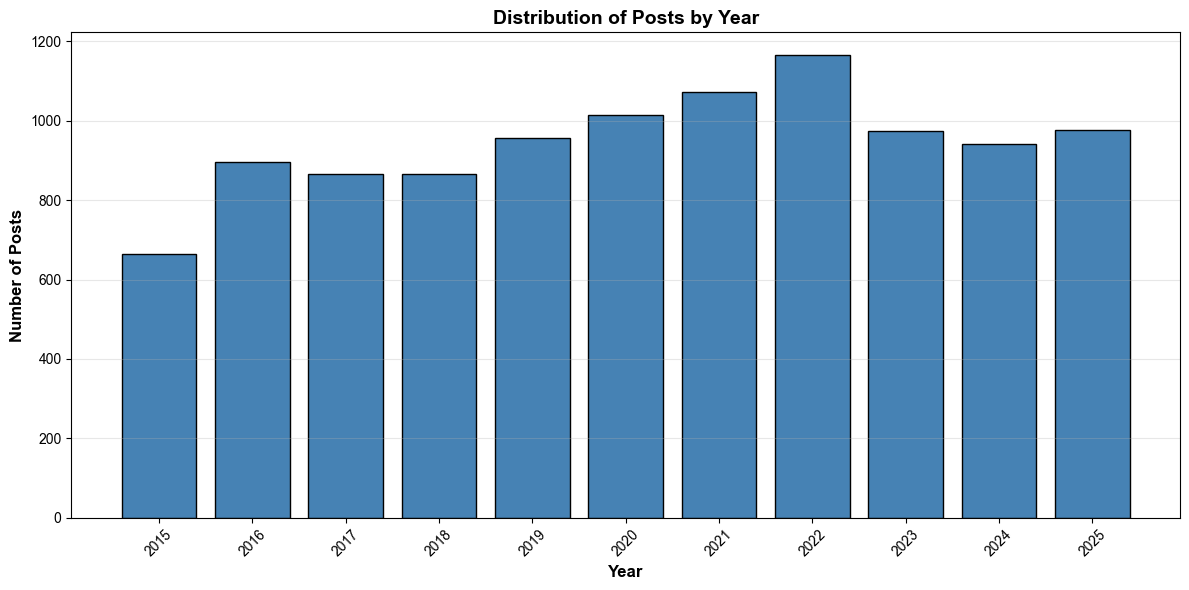

Most active year: 2022 with 1164 posts


In [44]:
# Visualization: Posts Distribution by Year
plt.figure(figsize=(12, 6))
year_dist = df['year'].value_counts().sort_index()
plt.bar(year_dist.index, year_dist.values, color='steelblue', edgecolor='black')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Posts', fontsize=12, fontweight='bold')
plt.title('Distribution of Posts by Year', fontsize=14, fontweight='bold')
plt.xticks(year_dist.index, [int(year) for year in year_dist.index], rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Most active year: {year_dist.idxmax()} with {year_dist.max()} posts")

In [45]:
# تحليل أنماط الفساتين (dress_style_category)
print("=" * 50)
print("توزيع أنماط الفساتين")
print("=" * 50)
style_dist = df['dress_style_category'].value_counts()
print(style_dist)
print(f"\nالنسب المئوية:")
print(df['dress_style_category'].value_counts(normalize=True) * 100)

توزيع أنماط الفساتين
dress_style_category
modest         4236
other          2660
modern         1434
embellished     685
luxury          677
vintage         430
bohemian        239
princess         22
mermaid           4
a-line            2
Name: count, dtype: int64

النسب المئوية:
dress_style_category
modest         40.773895
other          25.604004
modern         13.803061
embellished     6.593512
luxury          6.516508
vintage         4.138993
bohemian        2.300510
princess        0.211762
mermaid         0.038502
a-line          0.019251
Name: proportion, dtype: float64


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# === افترض إن trend_results جاهزة من الكود السابق ===
# لو مش موجودة، نعمل مثال سريع
# trend_results = [...]  # من الكود الأصلي

# تحويل إلى DataFrame
df_trends = pd.DataFrame(trend_results)

# ترتيب الأعمدة
df_trends = df_trends[['category', 'feature', 'trend', 'change', 'status']]
df_trends['change'] = df_trends['change'].round(1)
df_trends = df_trends.sort_values(['category', 'feature'])

# إضافة عمود للون حسب الاتجاه
def get_trend_color(trend):
    if 'Increasing' in trend:
        return '#d4edda'  # أخضر فاتح
    elif 'Decreasing' in trend:
        return '#f8d7da'  # أحمر فاتح
    elif 'Stable' in trend or 'Evergreen' in trend:
        return '#fff3cd'  # أصفر فاتح
    else:
        return '#e2e3e5'  # رمادي فاتح

df_trends['color'] = df_trends['trend'].apply(get_trend_color)

# إعداد الشكل
plt.figure(figsize=(14, 2 + len(df_trends) * 0.5))
ax = plt.gca()
ax.axis('off')

# رسم الجدول
table = ax.table(cellText=df_trends[['category', 'feature', 'trend', 'change', 'status']].values,
                 colLabels=['Category', 'Design Feature', 'Trend Type', 'Change %', 'Status'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.15, 0.2, 0.3, 0.15, 0.12])

# تنسيق الجدول
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2.2)

# تلوين الخلايا
for i in range(len(df_trends)):
    for j in range(5):
        table[(i+1, j)].set_facecolor(df_trends['color'].iloc[i])
        table[(i+1, j)].set_text_props(weight='normal')

# تنسيق العناوين
for j, label in enumerate(table.get_celld()[(0, j)].get_text().get_text()):
    cell = table.get_celld()[(0, j)]
    cell.set_facecolor('#2c3e50')
    cell.set_text_props(weight='bold', color='white')

# تنسيق صفوف الفئات (Category)
for i, cat in enumerate(df_trends['category']):
    cell = table.get_celld()[(i+1, 0)]
    cell.set_facecolor('#5dade2')
    cell.set_text_props(weight='bold', color='white')

# تنسيق عمود Change %
for i in range(len(df_trends)):
    change_val = df_trends['change'].iloc[i]
    cell = table.get_celld()[(i+1, 3)]
    if change_val > 0:
        cell.set_text_props(color='green', weight='bold')
    elif change_val < 0:
        cell.set_text_props(color='red', weight='bold')
    else:
        cell.set_text_props(color='gray')

# إضافة عنوان
plt.title("TREND CLASSIFICATION TABLE", fontsize=18, fontweight='bold', pad=30, loc='center')

# === إضافة ملخص في أسفل الرسم ===
summary_text = (
    f"📊 SUMMARY:\n"
    f"  • Increasing Trends: {increasing_count}  ↗\n"
    f"  • Decreasing Trends: {decreasing_count}  ↘\n"
    f"  • Stable/Evergreen: {stable_count}  →\n"
    f"  • Seasonal/Cyclical: {seasonal_count}  ↕\n"
    f"  • Total Analyzed: {len(trend_results)}"
)

plt.figtext(0.5, 0.02, summary_text, ha='center', fontsize=11, 
            bbox=dict(boxstyle="round,pad=0.5", facecolor="#f8f9fa", edgecolor="#dee2e6"))

# تحسين التنسيق
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.18)

# حفظ أو عرض
# plt.savefig("trend_classification_table.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

NameError: name 'trend_results' is not defined

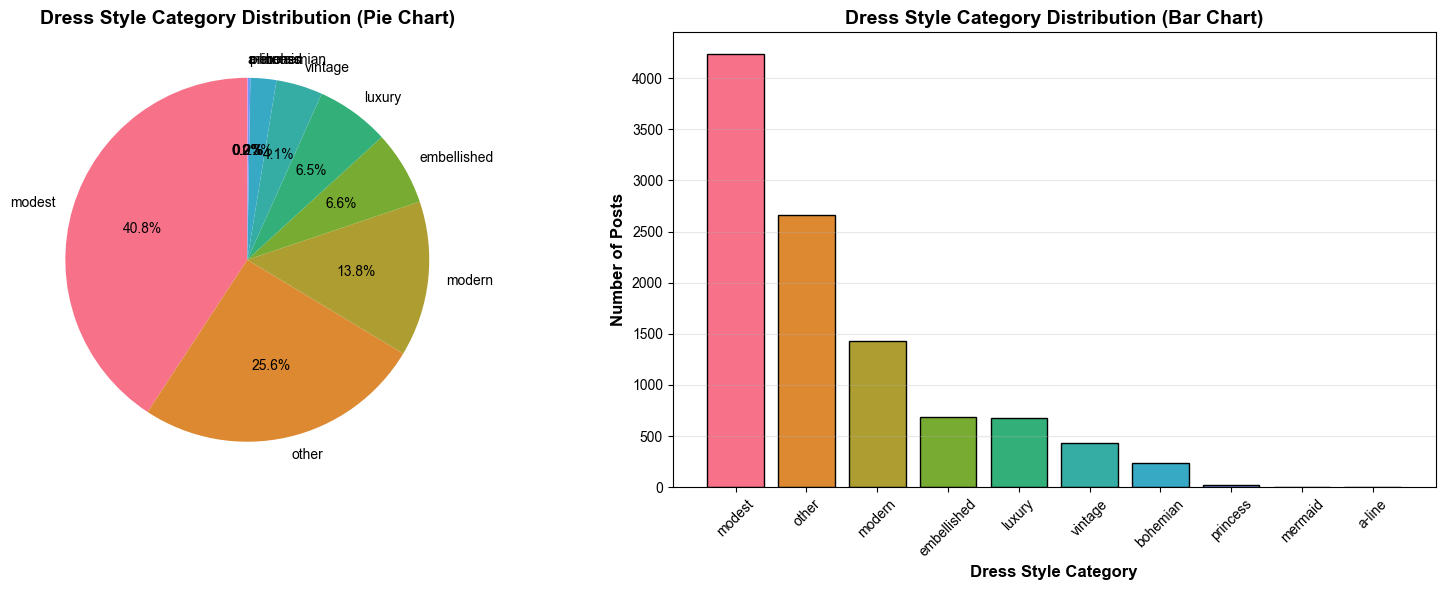

In [51]:
# Visualization: Dress Style Category Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie Chart
style_dist = df['dress_style_category'].value_counts()
colors = sns.color_palette('husl', len(style_dist))
axes[0].pie(style_dist.values, labels=style_dist.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[0].set_title('Dress Style Category Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar Chart
axes[1].bar(style_dist.index, style_dist.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Dress Style Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Posts', fontsize=12, fontweight='bold')
axes[1].set_title('Dress Style Category Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [47]:
# تحليل المشاعر في التعليقات
print("=" * 50)
print("توزيع المشاعر في التعليقات")
print("=" * 50)
sentiment_dist = df['comment_sentiment'].value_counts()
print(sentiment_dist)
print(f"\nالنسب المئوية:")
print(df['comment_sentiment'].value_counts(normalize=True) * 100)

توزيع المشاعر في التعليقات
comment_sentiment
neutral     9281
query        600
positive     504
negative       4
Name: count, dtype: int64

النسب المئوية:
comment_sentiment
neutral     89.334873
query        5.775339
positive     4.851285
negative     0.038502
Name: proportion, dtype: float64


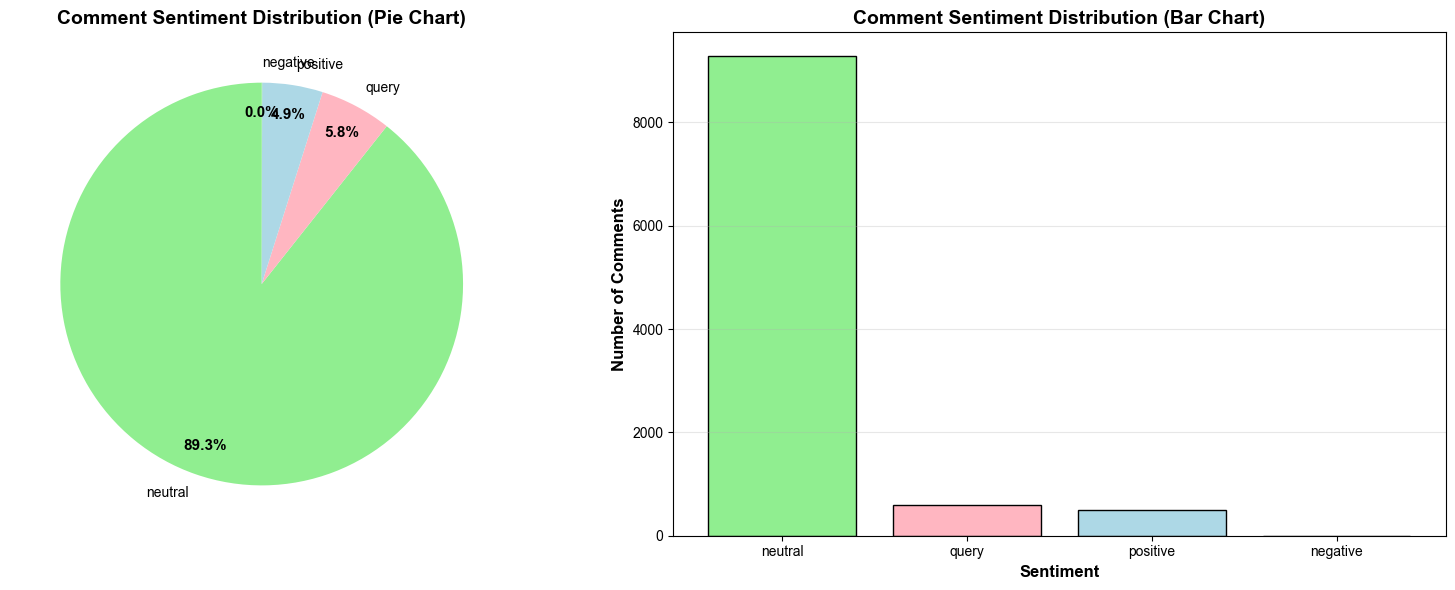

In [53]:
# Visualization: Comment Sentiment Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie Chart
sentiment_dist = df['comment_sentiment'].value_counts()
colors = ['#90EE90', '#FFB6C1', '#ADD8E6']
wedges, texts, autotexts = axes[0].pie(sentiment_dist.values, labels=sentiment_dist.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors,
                                         pctdistance=0.85, labeldistance=1.1)
# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
axes[0].set_title('Comment Sentiment Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar Chart
axes[1].bar(sentiment_dist.index, sentiment_dist.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Sentiment', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Comments', fontsize=12, fontweight='bold')
axes[1].set_title('Comment Sentiment Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [54]:
# تحليل التفاعل (Engagement Analysis)
print("=" * 50)
print("تحليل التفاعل")
print("=" * 50)
print(f"\nإجمالي الإعجابات: {df['likes'].sum():,}")
print(f"متوسط الإعجابات: {df['likes'].mean():.2f}")
print(f"أعلى إعجابات: {df['likes'].max()}")

print(f"\nإجمالي التعليقات: {df['post_comments_total'].sum():,}")
print(f"متوسط التعليقات: {df['post_comments_total'].mean():.2f}")
print(f"أعلى تعليقات: {df['post_comments_total'].max()}")

print(f"\nإجمالي المشاركات: {df['shares'].sum():,}")
print(f"متوسط المشاركات: {df['shares'].mean():.2f}")

print(f"\nإجمالي التفاعل الكلي: {df['total_engagement'].sum():,}")
print(f"متوسط التفاعل الكلي: {df['total_engagement'].mean():.2f}")

تحليل التفاعل

إجمالي الإعجابات: 7,824,768
متوسط الإعجابات: 753.18
أعلى إعجابات: 16000

إجمالي التعليقات: 109,796
متوسط التعليقات: 10.57
أعلى تعليقات: 916

إجمالي المشاركات: 279,221
متوسط المشاركات: 26.88

إجمالي التفاعل الكلي: 8,213,785
متوسط التفاعل الكلي: 790.62


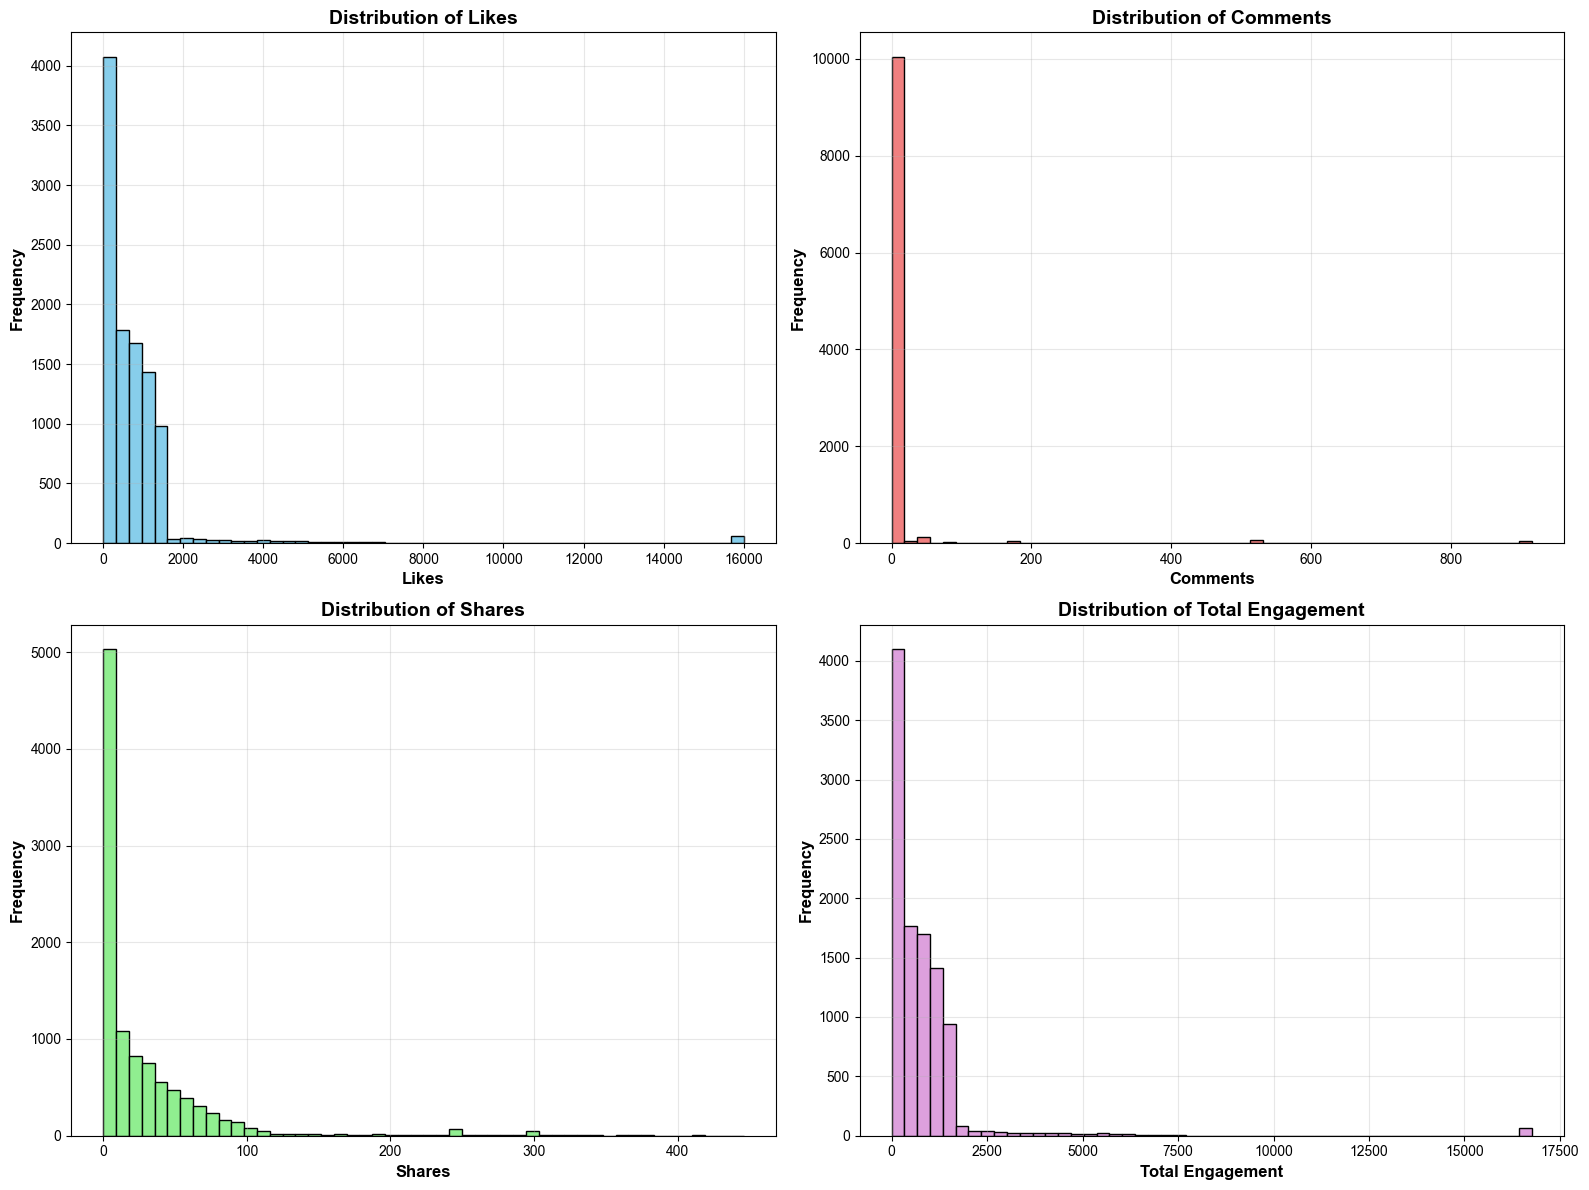

In [55]:
# Visualization: Engagement Metrics Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Likes Distribution
axes[0, 0].hist(df['likes'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Likes', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Distribution of Likes', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Comments Distribution
axes[0, 1].hist(df['post_comments_total'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Comments', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Distribution of Comments', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Shares Distribution
axes[1, 0].hist(df['shares'], bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Shares', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Distribution of Shares', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Total Engagement Distribution
axes[1, 1].hist(df['total_engagement'], bins=50, color='plum', edgecolor='black')
axes[1, 1].set_xlabel('Total Engagement', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Distribution of Total Engagement', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [56]:
# أفضل 10 منشورات من حيث التفاعل
print("=" * 50)
print("أفضل 10 منشورات من حيث التفاعل")
print("=" * 50)
top_posts = df.nlargest(10, 'total_engagement')[['year', 'dress_style_category', 'likes', 
                                                   'post_comments_total', 'shares', 
                                                   'total_engagement', 'comment_sentiment']]
print(top_posts)

أفضل 10 منشورات من حيث التفاعل
      year dress_style_category  likes  post_comments_total  shares  \
3204  2025                other  16000                  526     241   
3205  2025                other  16000                  526     241   
3206  2025                other  16000                  526     241   
3207  2025                other  16000                  526     241   
3208  2025                other  16000                  526     241   
3209  2025               modest  16000                  526     241   
3210  2025                other  16000                  526     241   
3211  2025                other  16000                  526     241   
3212  2025                other  16000                  526     241   
3213  2025               modest  16000                  526     241   

      total_engagement comment_sentiment  
3204             16767           neutral  
3205             16767           neutral  
3206             16767           neutral  
3207           

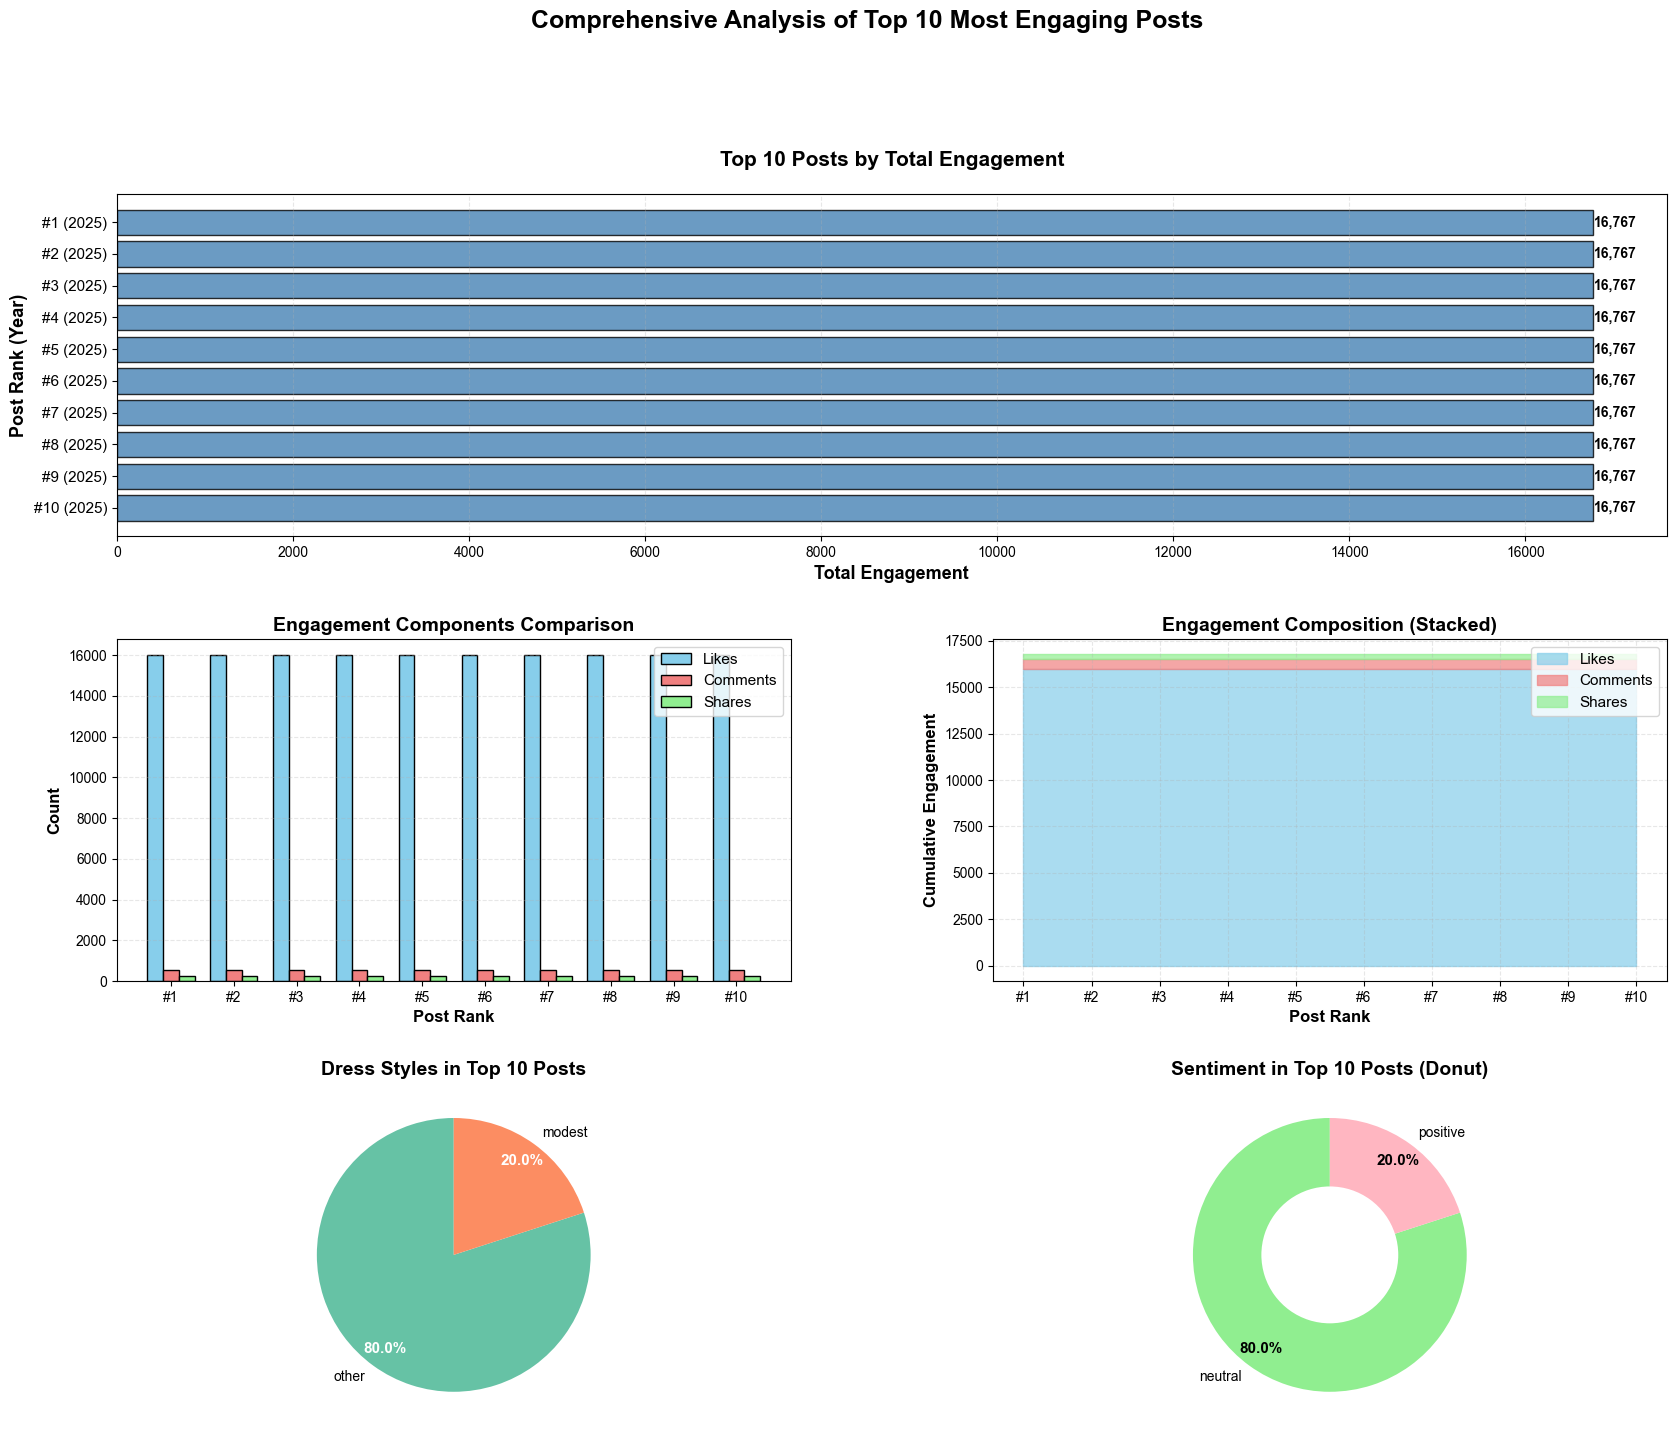


TOP 10 POSTS - DETAILED SUMMARY STATISTICS

Total Engagement:
  • Sum: 167,670
  • Average: 16767.00
  • Max: 16,767 (Post #1)
  • Min: 16,767 (Post #1)

Likes:
  • Average: 16000.00
  • Total: 160,000
  • Percentage of Total Engagement: 95.4%

Comments:
  • Average: 526.00
  • Total: 5,260
  • Percentage of Total Engagement: 3.1%

Shares:
  • Average: 241.00
  • Total: 2,410
  • Percentage of Total Engagement: 1.4%

Most Common Dress Style: other (8 posts)
Most Common Sentiment: neutral (8 posts)


In [58]:
# Visualization: Top 10 Posts by Total Engagement - Enhanced Version
top_posts = df.nlargest(10, 'total_engagement').reset_index(drop=True)

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Bar Chart - Total Engagement with Values
ax1 = fig.add_subplot(gs[0, :])
bars = ax1.barh(range(len(top_posts)), top_posts['total_engagement'].values, 
                color='steelblue', edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(top_posts)))
ax1.set_yticklabels([f"#{i+1} ({int(top_posts.loc[i, 'year'])})" for i in range(len(top_posts))], 
                     fontsize=11)
ax1.set_xlabel('Total Engagement', fontsize=13, fontweight='bold')
ax1.set_ylabel('Post Rank (Year)', fontsize=13, fontweight='bold')
ax1.set_title('Top 10 Posts by Total Engagement', fontsize=15, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.invert_yaxis()

# Add values on bars
for i, (bar, value) in enumerate(zip(bars, top_posts['total_engagement'].values)):
    ax1.text(value + 10, bar.get_y() + bar.get_height()/2, 
             f'{int(value):,}', va='center', fontsize=10, fontweight='bold')

# 2. Grouped Bar Chart - Engagement Components Comparison
ax2 = fig.add_subplot(gs[1, 0])
x = np.arange(len(top_posts))
width = 0.25

bars1 = ax2.bar(x - width, top_posts['likes'].values, width, label='Likes', 
                color='skyblue', edgecolor='black')
bars2 = ax2.bar(x, top_posts['post_comments_total'].values, width, label='Comments', 
                color='lightcoral', edgecolor='black')
bars3 = ax2.bar(x + width, top_posts['shares'].values, width, label='Shares', 
                color='lightgreen', edgecolor='black')

ax2.set_xlabel('Post Rank', fontsize=12, fontweight='bold')
ax2.set_ylabel('Count', fontsize=12, fontweight='bold')
ax2.set_title('Engagement Components Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f'#{i+1}' for i in range(len(top_posts))])
ax2.legend(loc='upper right', fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# 3. Stacked Area Chart - Engagement Composition
ax3 = fig.add_subplot(gs[1, 1])
ax3.fill_between(x, 0, top_posts['likes'].values, label='Likes', 
                 color='skyblue', alpha=0.7)
ax3.fill_between(x, top_posts['likes'].values, 
                 top_posts['likes'].values + top_posts['post_comments_total'].values,
                 label='Comments', color='lightcoral', alpha=0.7)
ax3.fill_between(x, top_posts['likes'].values + top_posts['post_comments_total'].values,
                 top_posts['total_engagement'].values, label='Shares', 
                 color='lightgreen', alpha=0.7)

ax3.set_xlabel('Post Rank', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cumulative Engagement', fontsize=12, fontweight='bold')
ax3.set_title('Engagement Composition (Stacked)', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([f'#{i+1}' for i in range(len(top_posts))])
ax3.legend(loc='upper right', fontsize=11)
ax3.grid(alpha=0.3, linestyle='--')

# 4. Pie Chart - Dress Style Distribution in Top Posts
ax4 = fig.add_subplot(gs[2, 0])
style_in_top = top_posts['dress_style_category'].value_counts()
colors_style = sns.color_palette('Set2', len(style_in_top))
wedges, texts, autotexts = ax4.pie(style_in_top.values, labels=style_in_top.index, 
                                     autopct='%1.1f%%', startangle=90, colors=colors_style,
                                     pctdistance=0.85, labeldistance=1.1)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
ax4.set_title('Dress Styles in Top 10 Posts', fontsize=14, fontweight='bold')

# 5. Donut Chart - Sentiment Distribution in Top Posts
ax5 = fig.add_subplot(gs[2, 1])
sentiment_in_top = top_posts['comment_sentiment'].value_counts()
colors_sent = ['#90EE90', '#FFB6C1', '#ADD8E6']
wedges, texts, autotexts = ax5.pie(sentiment_in_top.values, labels=sentiment_in_top.index, 
                                     autopct='%1.1f%%', startangle=90, 
                                     colors=colors_sent[:len(sentiment_in_top)],
                                     pctdistance=0.85, labeldistance=1.1,
                                     wedgeprops=dict(width=0.5))
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
ax5.set_title('Sentiment in Top 10 Posts (Donut)', fontsize=14, fontweight='bold')

plt.suptitle('Comprehensive Analysis of Top 10 Most Engaging Posts', 
             fontsize=18, fontweight='bold', y=0.995)
plt.show()

# Enhanced summary statistics with more details
print("\n" + "="*70)
print("TOP 10 POSTS - DETAILED SUMMARY STATISTICS")
print("="*70)
print(f"\nTotal Engagement:")
print(f"  • Sum: {top_posts['total_engagement'].sum():,}")
print(f"  • Average: {top_posts['total_engagement'].mean():.2f}")
print(f"  • Max: {top_posts['total_engagement'].max():,} (Post #{top_posts['total_engagement'].idxmax() + 1})")
print(f"  • Min: {top_posts['total_engagement'].min():,} (Post #{top_posts['total_engagement'].idxmin() + 1})")

print(f"\nLikes:")
print(f"  • Average: {top_posts['likes'].mean():.2f}")
print(f"  • Total: {top_posts['likes'].sum():,}")
print(f"  • Percentage of Total Engagement: {(top_posts['likes'].sum() / top_posts['total_engagement'].sum() * 100):.1f}%")

print(f"\nComments:")
print(f"  • Average: {top_posts['post_comments_total'].mean():.2f}")
print(f"  • Total: {top_posts['post_comments_total'].sum():,}")
print(f"  • Percentage of Total Engagement: {(top_posts['post_comments_total'].sum() / top_posts['total_engagement'].sum() * 100):.1f}%")

print(f"\nShares:")
print(f"  • Average: {top_posts['shares'].mean():.2f}")
print(f"  • Total: {top_posts['shares'].sum():,}")
print(f"  • Percentage of Total Engagement: {(top_posts['shares'].sum() / top_posts['total_engagement'].sum() * 100):.1f}%")

print(f"\nMost Common Dress Style: {style_in_top.index[0]} ({style_in_top.values[0]} posts)")
print(f"Most Common Sentiment: {sentiment_in_top.index[0]} ({sentiment_in_top.values[0]} posts)")
print("="*70)

In [59]:
# تحليل العلاقة بين نمط الفستان والتفاعل
print("=" * 50)
print("متوسط التفاعل حسب نمط الفستان")
print("=" * 50)
engagement_by_style = df.groupby('dress_style_category').agg({
    'total_engagement': 'mean',
    'likes': 'mean',
    'post_comments_total': 'mean',
    'shares': 'mean'
}).round(2).sort_values('total_engagement', ascending=False)

print(engagement_by_style)

متوسط التفاعل حسب نمط الفستان
                      total_engagement   likes  post_comments_total  shares
dress_style_category                                                       
bohemian                        944.27  907.97                 0.00   36.31
modern                          930.37  894.85                 0.88   34.65
embellished                     915.12  879.55                 0.72   34.85
modest                          907.05  870.72                 2.33   34.00
vintage                         896.32  863.50                 0.37   32.45
other                           614.59  565.82                35.67   13.10
mermaid                         368.00  338.75                25.75    3.50
luxury                          237.37  227.49                 3.78    6.10
princess                        105.86   88.55                16.68    0.64
a-line                           51.00    0.00                51.00    0.00


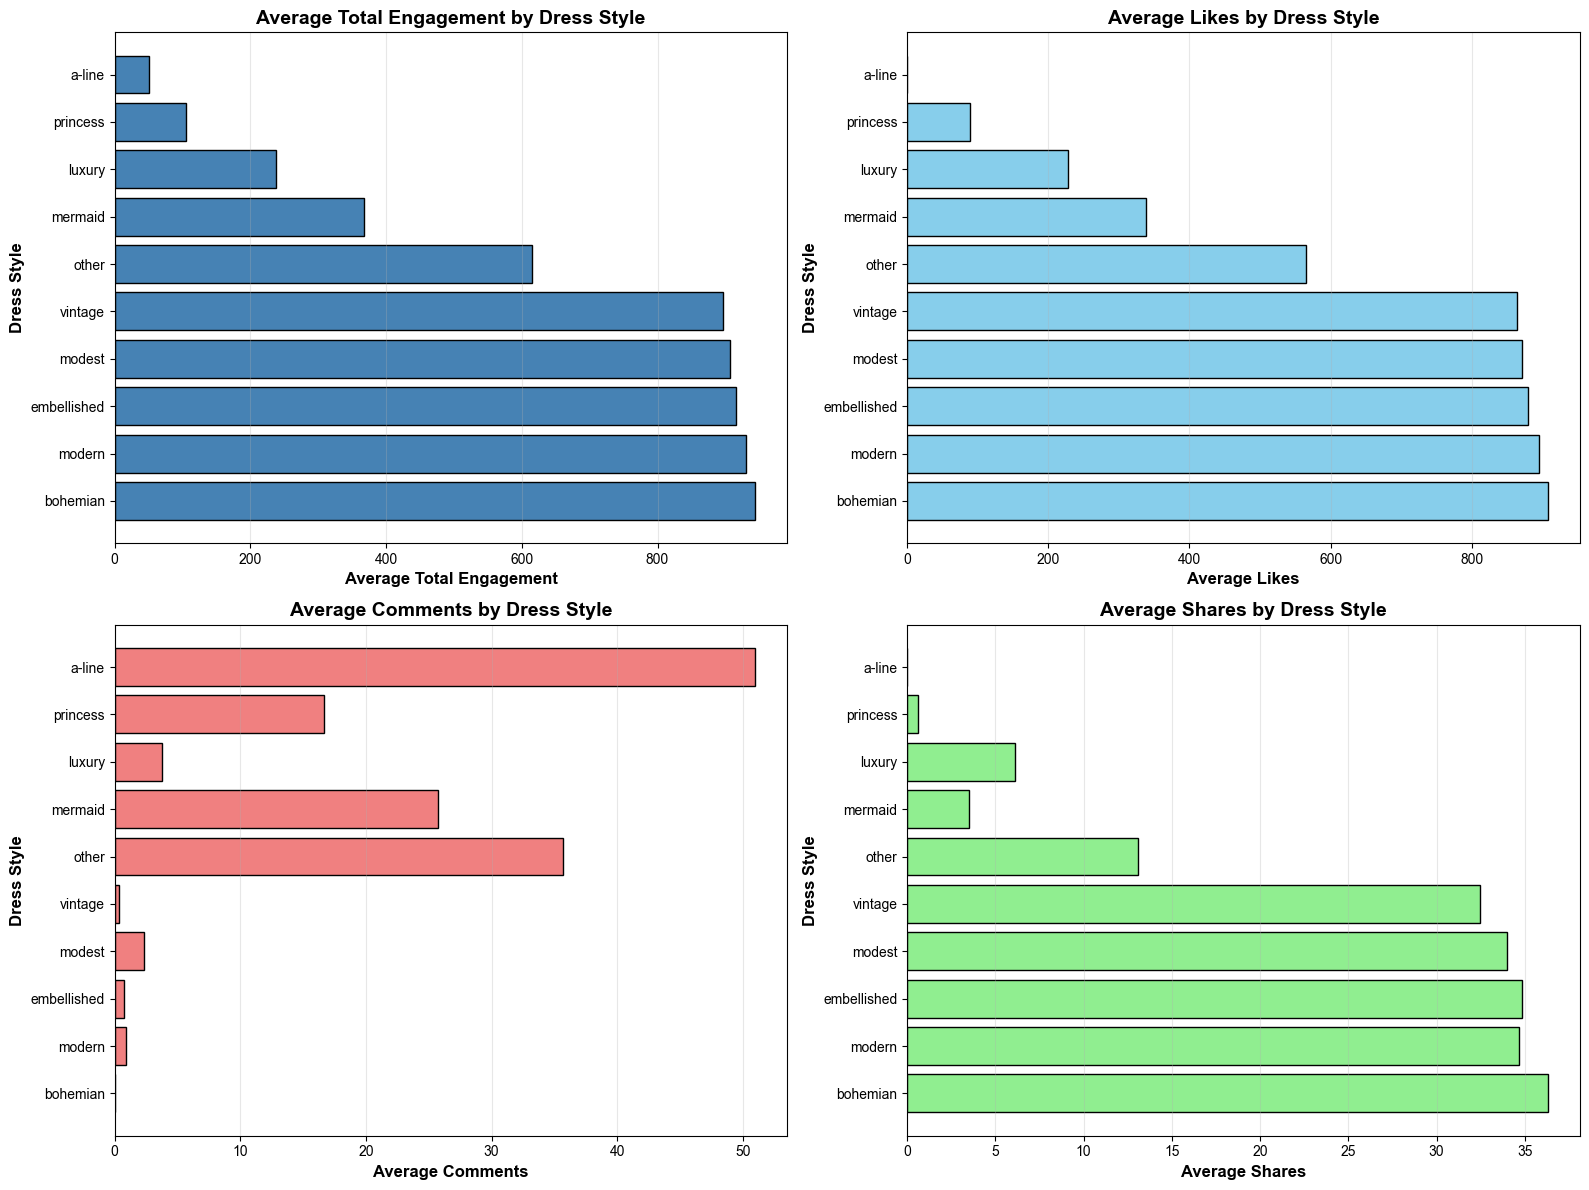

In [60]:
# Visualization: Average Engagement by Dress Style
engagement_by_style = df.groupby('dress_style_category').agg({
    'total_engagement': 'mean',
    'likes': 'mean',
    'post_comments_total': 'mean',
    'shares': 'mean'
}).round(2).sort_values('total_engagement', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total Engagement by Style
axes[0, 0].barh(engagement_by_style.index, engagement_by_style['total_engagement'], 
                color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Average Total Engagement', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Dress Style', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Average Total Engagement by Dress Style', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Likes by Style
axes[0, 1].barh(engagement_by_style.index, engagement_by_style['likes'], 
                color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Average Likes', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Dress Style', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Likes by Dress Style', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Comments by Style
axes[1, 0].barh(engagement_by_style.index, engagement_by_style['post_comments_total'], 
                color='lightcoral', edgecolor='black')
axes[1, 0].set_xlabel('Average Comments', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Dress Style', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average Comments by Dress Style', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Shares by Style
axes[1, 1].barh(engagement_by_style.index, engagement_by_style['shares'], 
                color='lightgreen', edgecolor='black')
axes[1, 1].set_xlabel('Average Shares', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Dress Style', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Shares by Dress Style', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [61]:
# تحليل العلاقة بين المشاعر والتفاعل
print("=" * 50)
print("متوسط التفاعل حسب المشاعر")
print("=" * 50)
engagement_by_sentiment = df.groupby('comment_sentiment').agg({
    'total_engagement': 'mean',
    'likes': 'mean',
    'post_comments_total': 'mean'
}).round(2).sort_values('total_engagement', ascending=False)

print(engagement_by_sentiment)

متوسط التفاعل حسب المشاعر
                   total_engagement   likes  post_comments_total
comment_sentiment                                               
neutral                      850.13  812.29                 8.42
negative                     637.00  590.00                40.00
positive                     449.40  392.48                45.92
query                        157.84  142.86                13.95


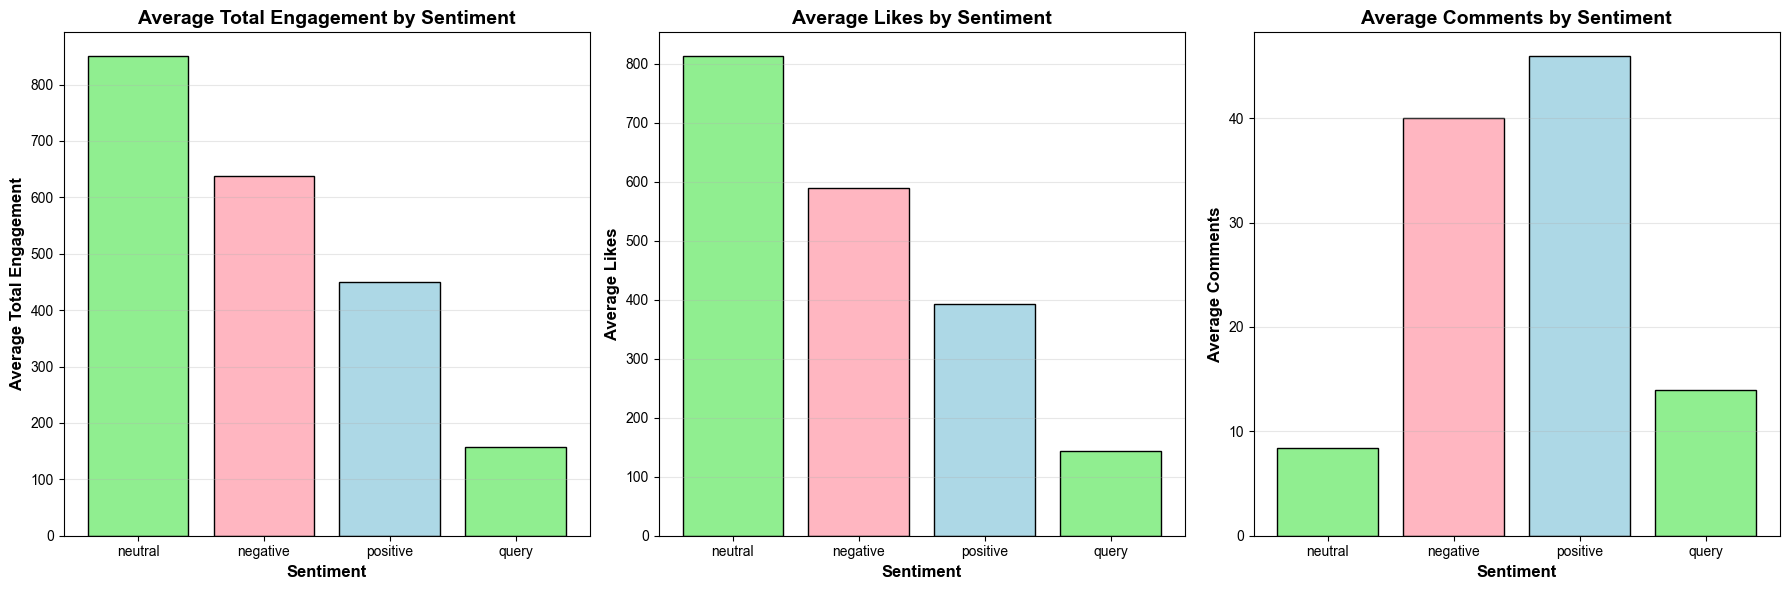

In [62]:
# Visualization: Average Engagement by Sentiment
engagement_by_sentiment = df.groupby('comment_sentiment').agg({
    'total_engagement': 'mean',
    'likes': 'mean',
    'post_comments_total': 'mean'
}).round(2).sort_values('total_engagement', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['#90EE90', '#FFB6C1', '#ADD8E6']

# Total Engagement by Sentiment
axes[0].bar(engagement_by_sentiment.index, engagement_by_sentiment['total_engagement'], 
            color=colors, edgecolor='black')
axes[0].set_xlabel('Sentiment', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Total Engagement', fontsize=12, fontweight='bold')
axes[0].set_title('Average Total Engagement by Sentiment', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Likes by Sentiment
axes[1].bar(engagement_by_sentiment.index, engagement_by_sentiment['likes'], 
            color=colors, edgecolor='black')
axes[1].set_xlabel('Sentiment', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Likes', fontsize=12, fontweight='bold')
axes[1].set_title('Average Likes by Sentiment', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Comments by Sentiment
axes[2].bar(engagement_by_sentiment.index, engagement_by_sentiment['post_comments_total'], 
            color=colors, edgecolor='black')
axes[2].set_xlabel('Sentiment', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Average Comments', fontsize=12, fontweight='bold')
axes[2].set_title('Average Comments by Sentiment', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

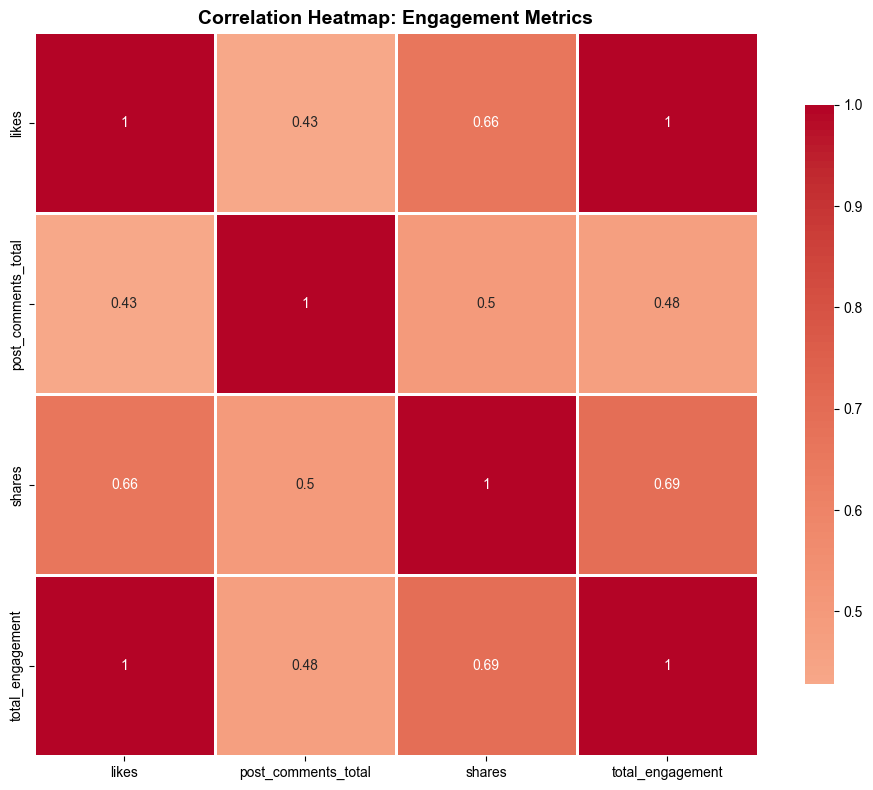

In [63]:
# Visualization: Heatmap - Correlation between Engagement Metrics
plt.figure(figsize=(10, 8))
engagement_cols = ['likes', 'post_comments_total', 'shares', 'total_engagement']
correlation_matrix = df[engagement_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Engagement Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

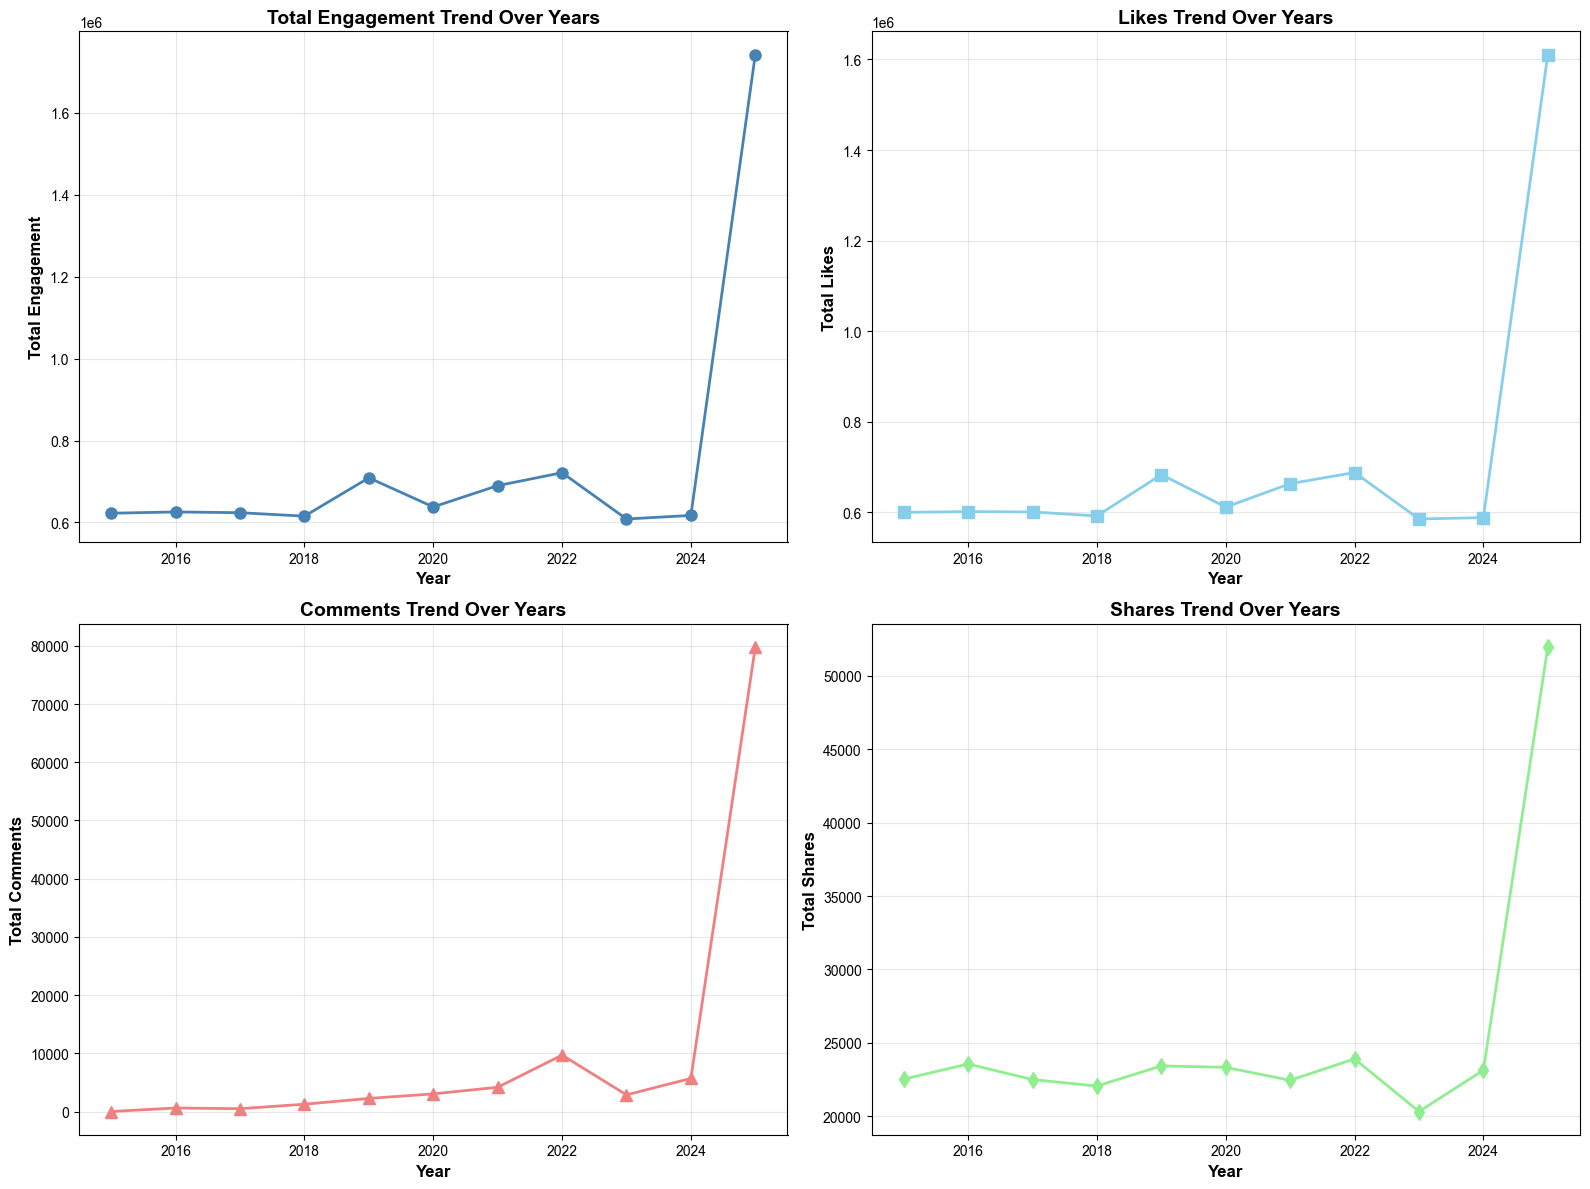

In [64]:
# Visualization: Engagement Trend Over Years
yearly_engagement = df.groupby('year').agg({
    'total_engagement': 'sum',
    'likes': 'sum',
    'post_comments_total': 'sum',
    'shares': 'sum'
}).sort_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total Engagement Over Time
axes[0, 0].plot(yearly_engagement.index, yearly_engagement['total_engagement'], 
                marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total Engagement', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Total Engagement Trend Over Years', fontsize=14, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Likes Over Time
axes[0, 1].plot(yearly_engagement.index, yearly_engagement['likes'], 
                marker='s', linewidth=2, markersize=8, color='skyblue')
axes[0, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Total Likes', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Likes Trend Over Years', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Comments Over Time
axes[1, 0].plot(yearly_engagement.index, yearly_engagement['post_comments_total'], 
                marker='^', linewidth=2, markersize=8, color='lightcoral')
axes[1, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Total Comments', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Comments Trend Over Years', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Shares Over Time
axes[1, 1].plot(yearly_engagement.index, yearly_engagement['shares'], 
                marker='d', linewidth=2, markersize=8, color='lightgreen')
axes[1, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Total Shares', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Shares Trend Over Years', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Time-Series Trend Analysis
### Fashion Trends Over Time by Category

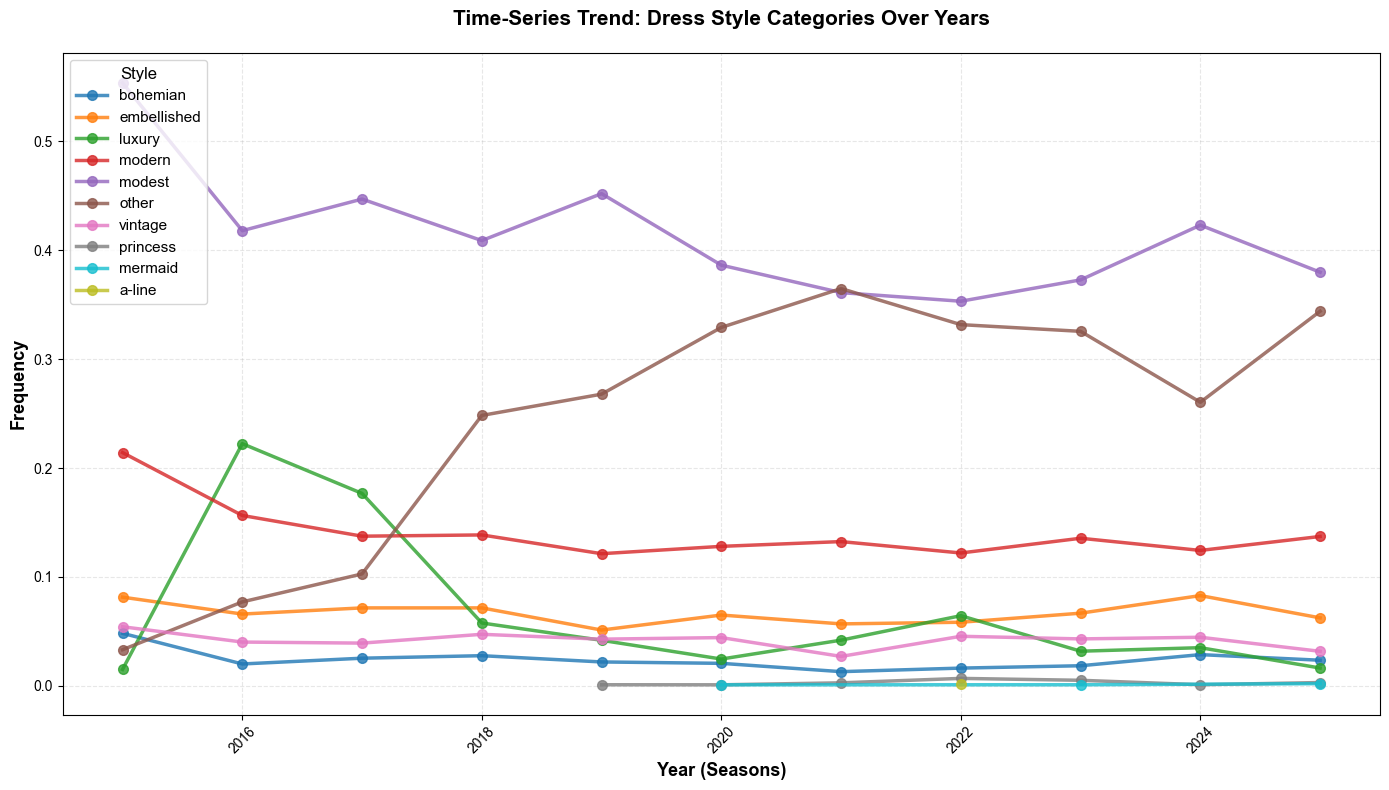


STYLE TREND ANALYSIS
bohemian: Decreasing trend
embellished: Decreasing trend
luxury: Increasing trend
modern: Decreasing trend
modest: Decreasing trend
other: Increasing trend
vintage: Decreasing trend
princess: Increasing trend
mermaid: Increasing trend
a-line: Decreasing trend


In [11]:
# Time-Series Analysis: Dress Style Trends Over Years
# Calculate frequency of each style per year
style_trend = df.groupby(['year', 'dress_style_category']).size().reset_index(name='frequency')
total_per_year = df.groupby('year').size().reset_index(name='total')
style_trend = style_trend.merge(total_per_year, on='year')
style_trend['frequency_normalized'] = style_trend['frequency'] / style_trend['total']

# Create the plot
plt.figure(figsize=(14, 8))

# Get unique styles and assign custom colors (avoiding yellow)
styles = style_trend['dress_style_category'].unique()
# Custom color palette without yellow
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                 '#8c564b', '#e377c2', '#7f7f7f', '#17becf', '#bcbd22']

for idx, style in enumerate(styles):
    style_data = style_trend[style_trend['dress_style_category'] == style]
    # Use custom color, or cycle through if more styles than colors
    color = custom_colors[idx % len(custom_colors)]
    plt.plot(style_data['year'], style_data['frequency_normalized'], 
             marker='o', linewidth=2.5, markersize=7, label=style, 
             color=color, alpha=0.8)

plt.xlabel('Year (Seasons)', fontsize=13, fontweight='bold')
plt.ylabel('Frequency', fontsize=13, fontweight='bold')
plt.title('Time-Series Trend: Dress Style Categories Over Years', 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(title='Style', loc='upper left', fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("STYLE TREND ANALYSIS")
print("="*60)
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style]
    if len(style_data) > 0:
        trend = "Increasing" if style_data.iloc[-1]['frequency_normalized'] > style_data.iloc[0]['frequency_normalized'] else "Decreasing"
        print(f"{style}: {trend} trend")
print("="*60)

In [13]:
## Advanced Time-Series Trend Analysis
### Multi-Category Fashion Trends Analysis (Style, Sentiment, and Engagement Patterns)

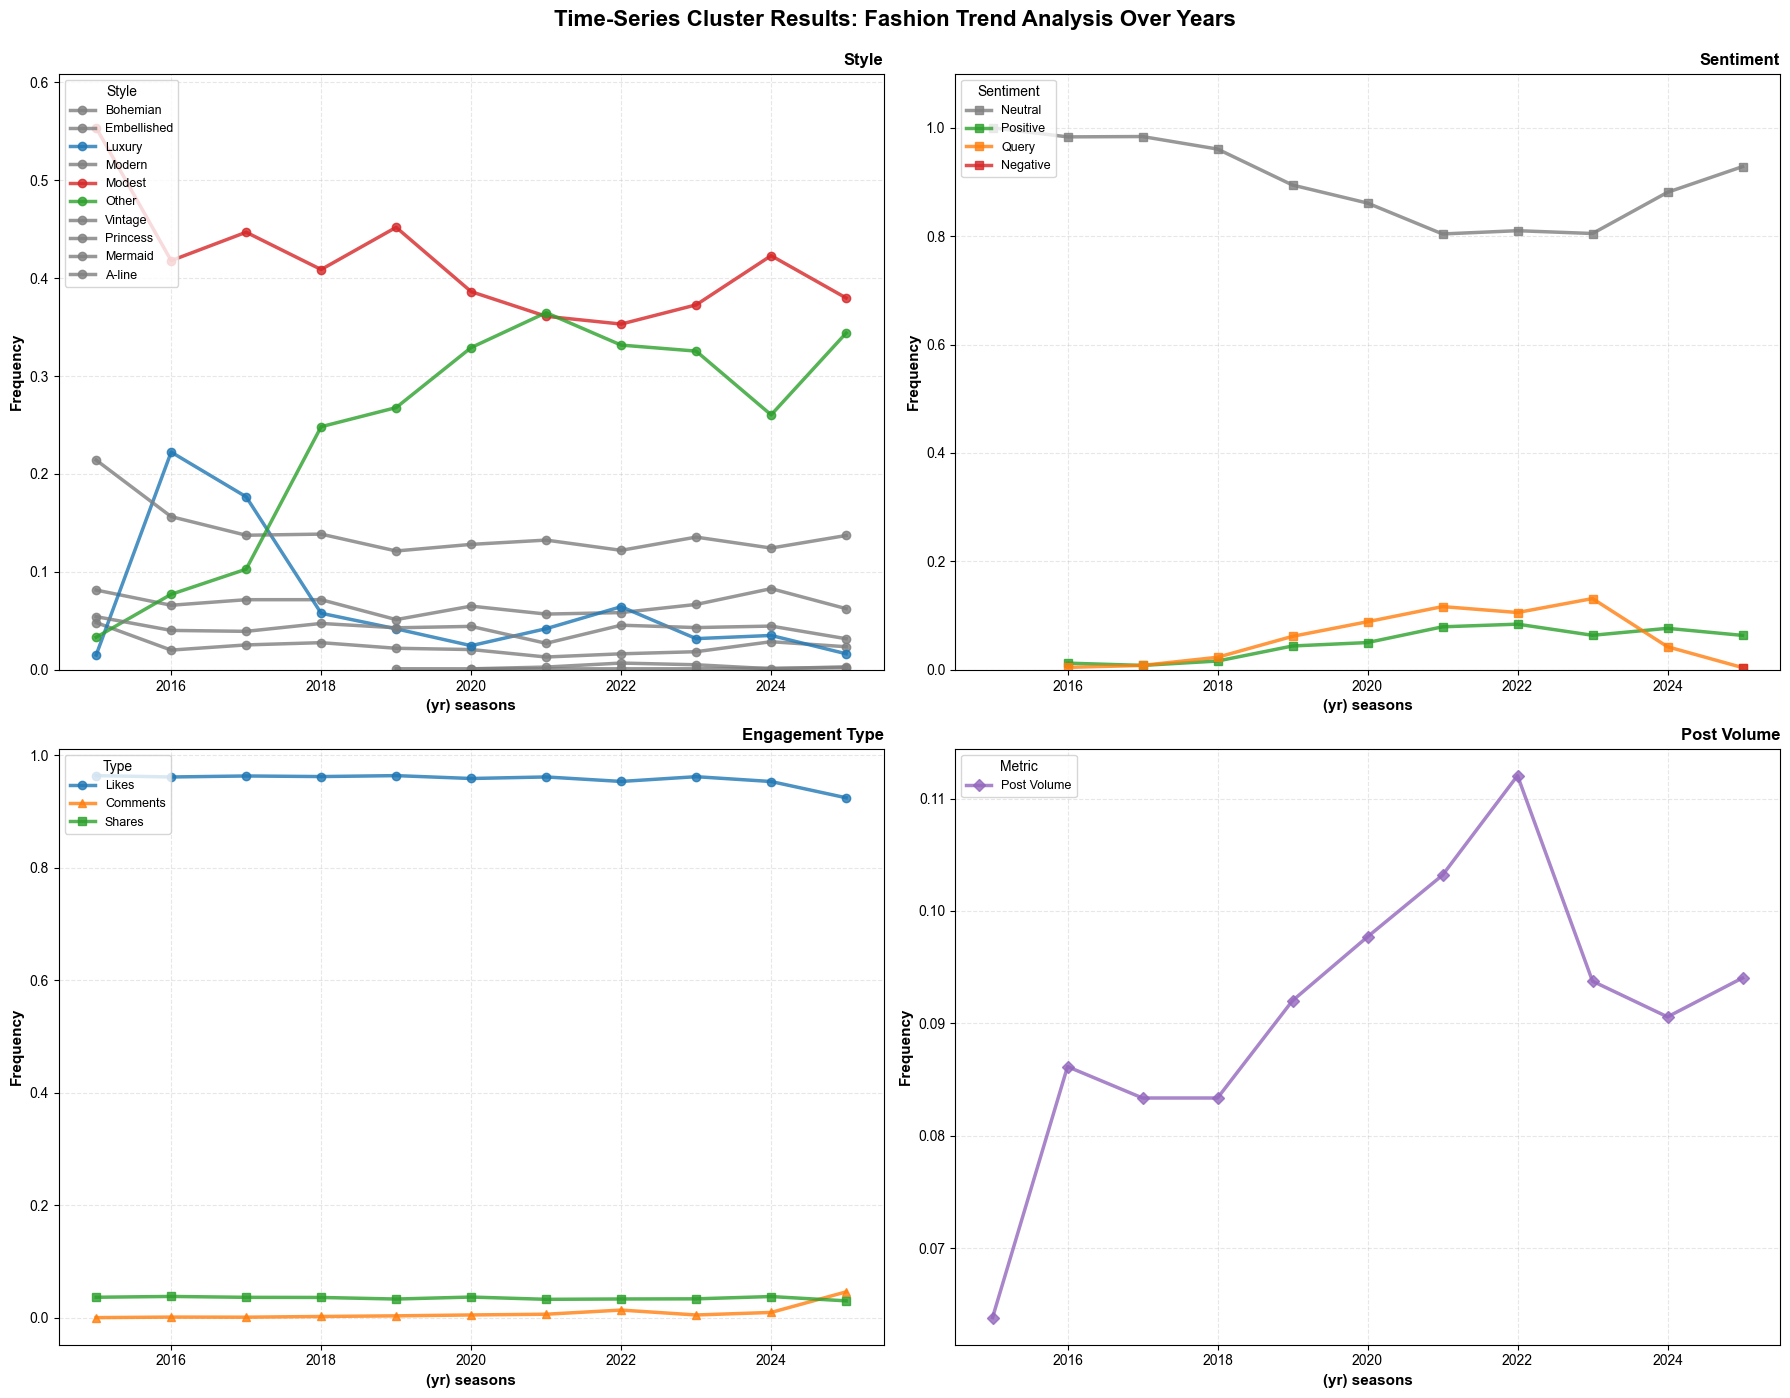


COMPREHENSIVE TREND ANALYSIS SUMMARY


In [14]:
# Create a comprehensive 2x2 subplot showing trends for different categories
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Time-Series Cluster Results: Fashion Trend Analysis Over Years', 
             fontsize=16, fontweight='bold', y=0.995)

# ========== 1. STYLE TRENDS (Top Left) ==========
ax1 = axes[0, 0]
style_trend = df.groupby(['year', 'dress_style_category']).size().reset_index(name='frequency')
total_per_year = df.groupby('year').size().reset_index(name='total')
style_trend = style_trend.merge(total_per_year, on='year')
style_trend['frequency_normalized'] = style_trend['frequency'] / style_trend['total']

styles = style_trend['dress_style_category'].unique()
style_colors = {'luxury': '#1f77b4', 'modest': '#d62728', 'other': '#2ca02c'}

for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style]
    color = style_colors.get(style, '#7f7f7f')
    ax1.plot(style_data['year'], style_data['frequency_normalized'], 
             marker='o', linewidth=2.5, markersize=6, label=style.capitalize(), 
             color=color, alpha=0.8)

ax1.set_xlabel('(yr) seasons', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax1.set_title('Style', fontsize=12, fontweight='bold', loc='right')
ax1.legend(title='Style', loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim(0, max(style_trend['frequency_normalized']) * 1.1)

# ========== 2. SENTIMENT TRENDS (Top Right) ==========
ax2 = axes[0, 1]
sentiment_trend = df.groupby(['year', 'comment_sentiment']).size().reset_index(name='frequency')
sentiment_trend = sentiment_trend.merge(total_per_year, on='year')
sentiment_trend['frequency_normalized'] = sentiment_trend['frequency'] / sentiment_trend['total']

sentiments = sentiment_trend['comment_sentiment'].unique()
sentiment_colors = {'positive': '#2ca02c', 'neutral': '#7f7f7f', 'query': '#ff7f0e', 'negative': '#d62728'}

for sentiment in sentiments:
    sent_data = sentiment_trend[sentiment_trend['comment_sentiment'] == sentiment]
    color = sentiment_colors.get(sentiment, '#1f77b4')
    ax2.plot(sent_data['year'], sent_data['frequency_normalized'], 
             marker='s', linewidth=2.5, markersize=6, label=sentiment.capitalize(), 
             color=color, alpha=0.8)

ax2.set_xlabel('(yr) seasons', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax2.set_title('Sentiment', fontsize=12, fontweight='bold', loc='right')
ax2.legend(title='Sentiment', loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_ylim(0, max(sentiment_trend['frequency_normalized']) * 1.1)

# ========== 3. ENGAGEMENT TRENDS (Bottom Left) ==========
ax3 = axes[1, 0]
# Normalize engagement metrics by year
yearly_stats = df.groupby('year').agg({
    'likes': 'sum',
    'post_comments_total': 'sum',
    'shares': 'sum'
}).reset_index()

yearly_total = yearly_stats[['likes', 'post_comments_total', 'shares']].sum(axis=1)
yearly_stats['likes_norm'] = yearly_stats['likes'] / yearly_total
yearly_stats['comments_norm'] = yearly_stats['post_comments_total'] / yearly_total
yearly_stats['shares_norm'] = yearly_stats['shares'] / yearly_total

ax3.plot(yearly_stats['year'], yearly_stats['likes_norm'], 
         marker='o', linewidth=2.5, markersize=6, label='Likes', color='#1f77b4', alpha=0.8)
ax3.plot(yearly_stats['year'], yearly_stats['comments_norm'], 
         marker='^', linewidth=2.5, markersize=6, label='Comments', color='#ff7f0e', alpha=0.8)
ax3.plot(yearly_stats['year'], yearly_stats['shares_norm'], 
         marker='s', linewidth=2.5, markersize=6, label='Shares', color='#2ca02c', alpha=0.8)

ax3.set_xlabel('(yr) seasons', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Engagement Type', fontsize=12, fontweight='bold', loc='right')
ax3.legend(title='Type', loc='upper left', fontsize=9)
ax3.grid(True, alpha=0.3, linestyle='--')

# ========== 4. YEARLY POST VOLUME TREND (Bottom Right) ==========
ax4 = axes[1, 1]
post_trend = df.groupby('year').size().reset_index(name='post_count')
# Normalize to show relative frequency
post_trend['frequency'] = post_trend['post_count'] / post_trend['post_count'].sum()

ax4.plot(post_trend['year'], post_trend['frequency'], 
         marker='D', linewidth=2.5, markersize=6, label='Post Volume', 
         color='#9467bd', alpha=0.8)

ax4.set_xlabel('(yr) seasons', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Post Volume', fontsize=12, fontweight='bold', loc='right')
ax4.legend(title='Metric', loc='upper left', fontsize=9)
ax4.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("COMPREHENSIVE TREND ANALYSIS SUMMARY")
print("="*70)

In [15]:
# Detailed Trend Classification Analysis with Visual Results
# This mimics the structure from the research paper images

print("\n" + "="*90)
print("TIME-SERIES CLUSTER RESULTS: DETAILED CLASSIFICATION")
print("="*90)

# Function to classify trends
def classify_trend(data_series):
    """Classify trend as Increasing, Decreasing, Evergreen, or Seasonal"""
    if len(data_series) < 3:
        return "Insufficient Data"
    
    # Calculate trend metrics
    first_half_avg = data_series[:len(data_series)//2].mean()
    second_half_avg = data_series[len(data_series)//2:].mean()
    overall_std = data_series.std()
    overall_mean = data_series.mean()
    
    # Linear regression slope
    x = np.arange(len(data_series))
    slope = np.polyfit(x, data_series, 1)[0]
    
    # Classification logic
    if abs(slope) < 0.01 and overall_std < overall_mean * 0.3:
        return "Evergreen (Stable)"
    elif slope > 0.015:
        if second_half_avg > first_half_avg * 1.5:
            return "Rapidly Increasing"
        return "Increasing"
    elif slope < -0.015:
        return "Decreasing"
    elif overall_std > overall_mean * 0.5:
        return "Seasonal (Fluctuating)"
    else:
        return "Stable"

# ========== STYLE TRENDS ==========
print("\n📊 STYLE CATEGORY TRENDS:")
print("-" * 90)
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    trend_type = classify_trend(style_data['frequency_normalized'].values)
    avg_freq = style_data['frequency_normalized'].mean()
    
    # Get first and last year values
    first_val = style_data['frequency_normalized'].iloc[0]
    last_val = style_data['frequency_normalized'].iloc[-1]
    change_pct = ((last_val - first_val) / first_val * 100) if first_val > 0 else 0
    
    print(f"\n{style.upper():15s} | {trend_type:25s}")
    print(f"  └─ Average Frequency: {avg_freq:.3f}")
    print(f"  └─ Change: {first_val:.3f} → {last_val:.3f} ({change_pct:+.1f}%)")

# ========== SENTIMENT TRENDS ==========
print("\n\n💬 SENTIMENT TRENDS:")
print("-" * 90)
for sentiment in sentiments:
    sent_data = sentiment_trend[sentiment_trend['comment_sentiment'] == sentiment].sort_values('year')
    trend_type = classify_trend(sent_data['frequency_normalized'].values)
    avg_freq = sent_data['frequency_normalized'].mean()
    
    first_val = sent_data['frequency_normalized'].iloc[0]
    last_val = sent_data['frequency_normalized'].iloc[-1]
    change_pct = ((last_val - first_val) / first_val * 100) if first_val > 0 else 0
    
    print(f"\n{sentiment.upper():15s} | {trend_type:25s}")
    print(f"  └─ Average Frequency: {avg_freq:.3f}")
    print(f"  └─ Change: {first_val:.3f} → {last_val:.3f} ({change_pct:+.1f}%)")

# ========== ENGAGEMENT TRENDS ==========
print("\n\n📈 ENGAGEMENT METRIC TRENDS:")
print("-" * 90)
engagement_metrics = ['likes', 'comments', 'shares']
engagement_data = [yearly_stats['likes_norm'].values, 
                   yearly_stats['comments_norm'].values, 
                   yearly_stats['shares_norm'].values]

for metric, data in zip(engagement_metrics, engagement_data):
    trend_type = classify_trend(data)
    avg_freq = data.mean()
    change_pct = ((data[-1] - data[0]) / data[0] * 100) if data[0] > 0 else 0
    
    print(f"\n{metric.upper():15s} | {trend_type:25s}")
    print(f"  └─ Average Frequency: {avg_freq:.3f}")
    print(f"  └─ Change: {data[0]:.3f} → {data[-1]:.3f} ({change_pct:+.1f}%)")

print("\n" + "="*90)


TIME-SERIES CLUSTER RESULTS: DETAILED CLASSIFICATION

📊 STYLE CATEGORY TRENDS:
------------------------------------------------------------------------------------------

BOHEMIAN        | Stable                   
  └─ Average Frequency: 0.024
  └─ Change: 0.048 → 0.024 (-51.2%)

EMBELLISHED     | Evergreen (Stable)       
  └─ Average Frequency: 0.067
  └─ Change: 0.081 → 0.062 (-23.3%)

LUXURY          | Seasonal (Fluctuating)   
  └─ Average Frequency: 0.066
  └─ Change: 0.015 → 0.016 (+8.6%)

MODERN          | Evergreen (Stable)       
  └─ Average Frequency: 0.141
  └─ Change: 0.214 → 0.137 (-36.0%)

MODEST          | Stable                   
  └─ Average Frequency: 0.414
  └─ Change: 0.554 → 0.380 (-31.4%)

OTHER           | Rapidly Increasing       
  └─ Average Frequency: 0.244
  └─ Change: 0.033 → 0.344 (+936.4%)

VINTAGE         | Evergreen (Stable)       
  └─ Average Frequency: 0.042
  └─ Change: 0.054 → 0.032 (-41.6%)

PRINCESS        | Seasonal (Fluctuating)   
  └─ Av

c:\Users\Islam_Abdelmotalib\PycharmProjects\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Islam_Abdelmotalib\PycharmProjects\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


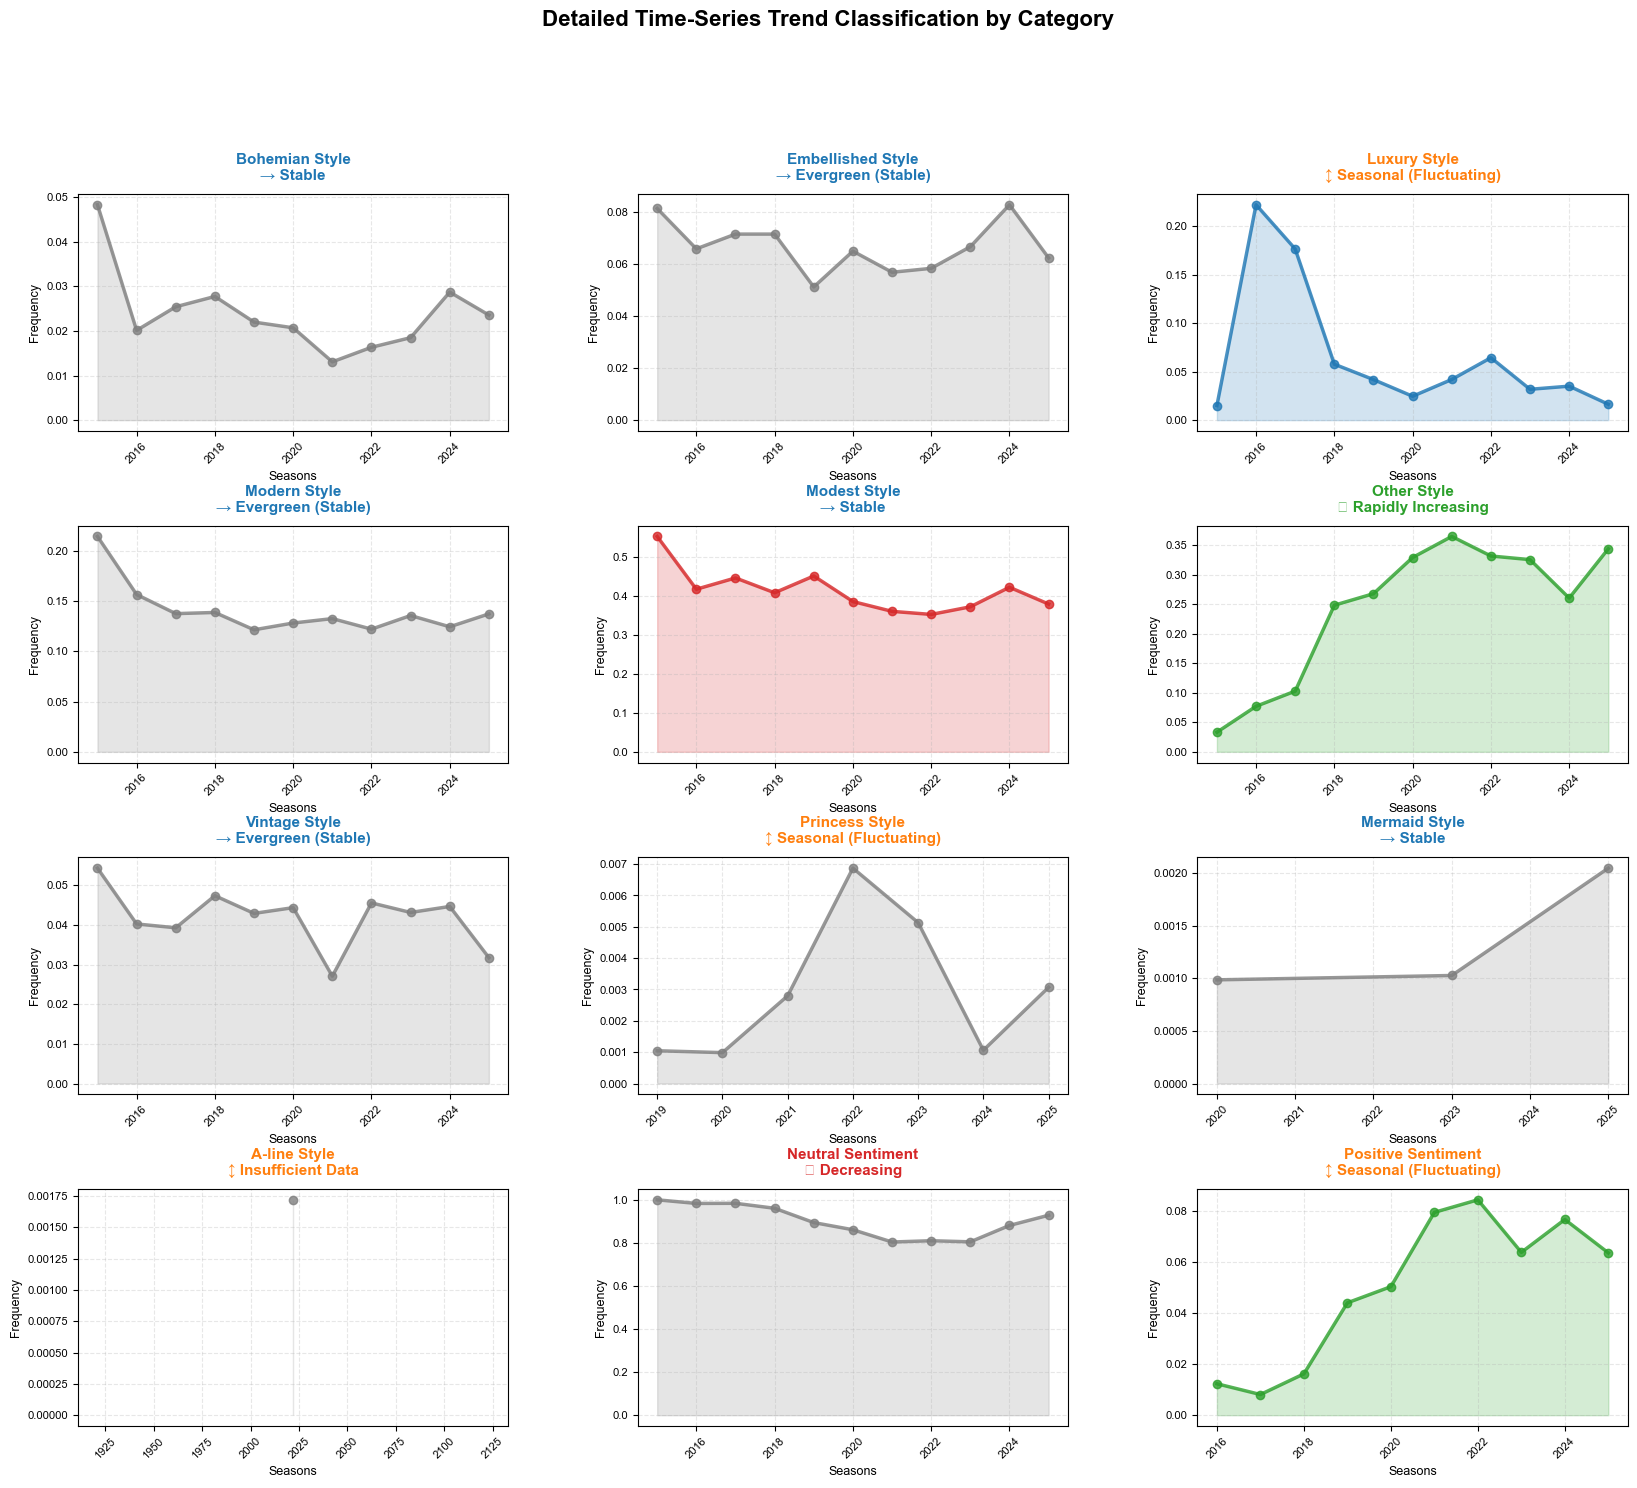


✅ Individual trend visualizations completed!


In [16]:
# Individual Trend Visualizations with Classification Labels
# Similar to Table 2 in the research paper

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)

plot_idx = 0
categories_to_plot = []

# Prepare data for each style
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    trend_type = classify_trend(style_data['frequency_normalized'].values)
    categories_to_plot.append({
        'name': f"{style.capitalize()} Style",
        'data': style_data,
        'x': 'year',
        'y': 'frequency_normalized',
        'trend': trend_type,
        'color': style_colors.get(style, '#7f7f7f')
    })

# Add sentiment trends
for sentiment in sentiments:
    sent_data = sentiment_trend[sentiment_trend['comment_sentiment'] == sentiment].sort_values('year')
    trend_type = classify_trend(sent_data['frequency_normalized'].values)
    categories_to_plot.append({
        'name': f"{sentiment.capitalize()} Sentiment",
        'data': sent_data,
        'x': 'year',
        'y': 'frequency_normalized',
        'trend': trend_type,
        'color': sentiment_colors.get(sentiment, '#1f77b4')
    })

# Plot each category
for i, cat_info in enumerate(categories_to_plot[:12]):  # Limit to 12 plots (4x3 grid)
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col])
    
    data = cat_info['data']
    ax.plot(data[cat_info['x']], data[cat_info['y']], 
            marker='o', linewidth=2.5, markersize=6, 
            color=cat_info['color'], alpha=0.8)
    
    # Add trend classification label
    trend_label = cat_info['trend']
    if 'Increasing' in trend_label:
        label_color = '#2ca02c'
        label_symbol = '↗'
    elif 'Decreasing' in trend_label:
        label_color = '#d62728'
        label_symbol = '↘'
    elif 'Evergreen' in trend_label or 'Stable' in trend_label:
        label_color = '#1f77b4'
        label_symbol = '→'
    else:
        label_color = '#ff7f0e'
        label_symbol = '↕'
    
    ax.set_title(f"{cat_info['name']}\n{label_symbol} {trend_label}", 
                fontsize=11, fontweight='bold', color=label_color, pad=10)
    ax.set_xlabel('Seasons', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    # Fill area under curve
    ax.fill_between(data[cat_info['x']], 0, data[cat_info['y']], 
                    alpha=0.2, color=cat_info['color'])

plt.suptitle('Detailed Time-Series Trend Classification by Category', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n✅ Individual trend visualizations completed!")

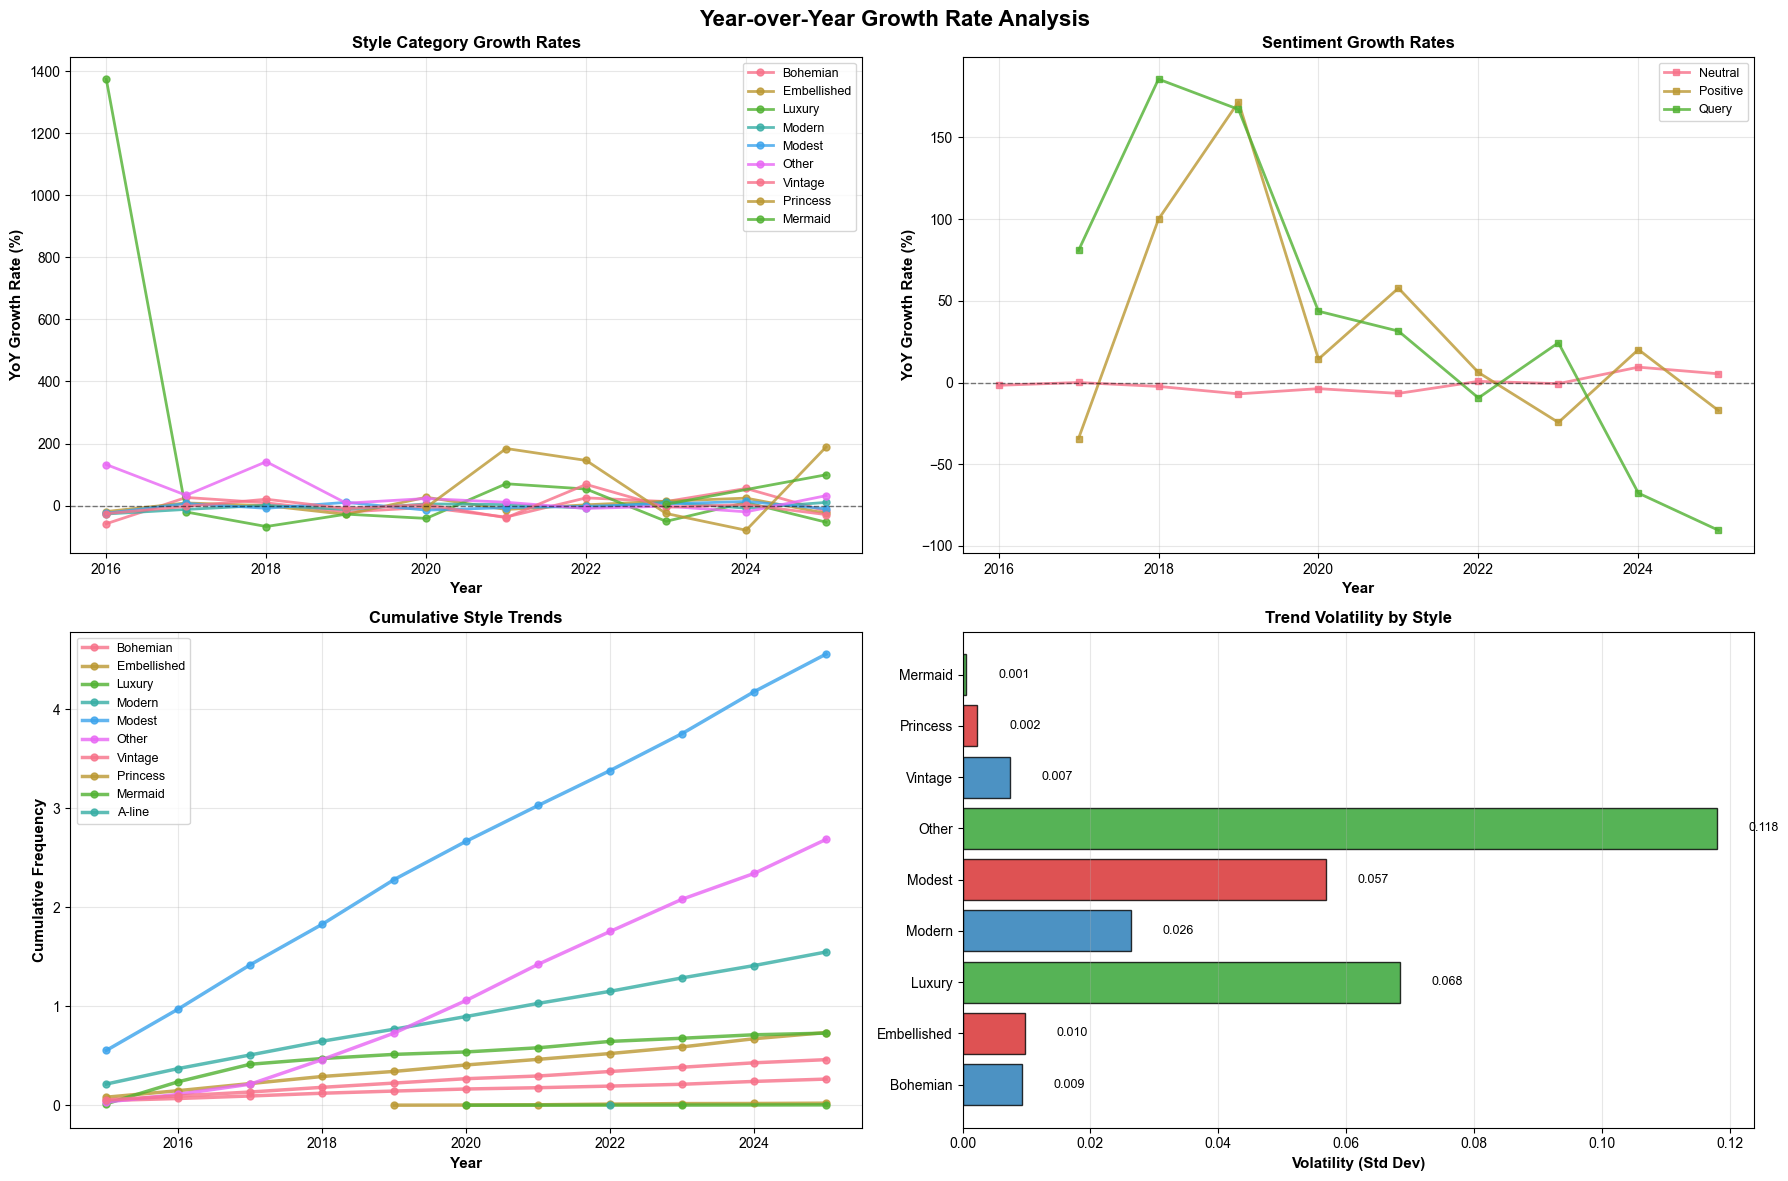


✅ Year-over-Year growth analysis completed!


In [17]:
# Comparative Analysis: Year-over-Year Growth Rates
# This provides insights into acceleration/deceleration of trends

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Year-over-Year Growth Rate Analysis', fontsize=16, fontweight='bold')

# ========== 1. Style YoY Growth ==========
ax1 = axes[0, 0]
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    if len(style_data) > 1:
        yoy_growth = style_data['frequency_normalized'].pct_change() * 100
        ax1.plot(style_data['year'].iloc[1:], yoy_growth.iloc[1:], 
                marker='o', linewidth=2, markersize=5, 
                label=style.capitalize(), alpha=0.8)

ax1.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_xlabel('Year', fontsize=11, fontweight='bold')
ax1.set_ylabel('YoY Growth Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Style Category Growth Rates', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# ========== 2. Sentiment YoY Growth ==========
ax2 = axes[0, 1]
for sentiment in sentiments:
    sent_data = sentiment_trend[sentiment_trend['comment_sentiment'] == sentiment].sort_values('year')
    if len(sent_data) > 1:
        yoy_growth = sent_data['frequency_normalized'].pct_change() * 100
        ax2.plot(sent_data['year'].iloc[1:], yoy_growth.iloc[1:], 
                marker='s', linewidth=2, markersize=5, 
                label=sentiment.capitalize(), alpha=0.8)

ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
ax2.set_ylabel('YoY Growth Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Sentiment Growth Rates', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# ========== 3. Cumulative Trend ==========
ax3 = axes[1, 0]
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    cumulative = style_data['frequency_normalized'].cumsum()
    ax3.plot(style_data['year'], cumulative, 
            marker='o', linewidth=2.5, markersize=5, 
            label=style.capitalize(), alpha=0.8)

ax3.set_xlabel('Year', fontsize=11, fontweight='bold')
ax3.set_ylabel('Cumulative Frequency', fontsize=11, fontweight='bold')
ax3.set_title('Cumulative Style Trends', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# ========== 4. Volatility Index ==========
ax4 = axes[1, 1]
volatility_data = []
labels = []

for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style]
    volatility = style_data['frequency_normalized'].std()
    volatility_data.append(volatility)
    labels.append(style.capitalize())

bars = ax4.barh(labels, volatility_data, color=['#1f77b4', '#d62728', '#2ca02c'], 
                edgecolor='black', alpha=0.8)
ax4.set_xlabel('Volatility (Std Dev)', fontsize=11, fontweight='bold')
ax4.set_title('Trend Volatility by Style', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add values on bars
for bar, val in zip(bars, volatility_data):
    ax4.text(val + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ Year-over-Year growth analysis completed!")

In [18]:
# Final Summary Report: Key Insights and Predictions
print("\n" + "="*90)
print("EXECUTIVE SUMMARY: FASHION TREND INSIGHTS")
print("="*90)

# Most dominant style
dominant_style = df['dress_style_category'].value_counts().index[0]
dominant_pct = df['dress_style_category'].value_counts(normalize=True).iloc[0] * 100

print(f"\n🏆 DOMINANT STYLE: {dominant_style.upper()} ({dominant_pct:.1f}% of all posts)")

# Fastest growing trend
print("\n📈 FASTEST GROWING TRENDS:")
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    if len(style_data) >= 2:
        first_val = style_data['frequency_normalized'].iloc[0]
        last_val = style_data['frequency_normalized'].iloc[-1]
        growth = ((last_val - first_val) / first_val * 100) if first_val > 0 else 0
        print(f"  • {style.capitalize():12s}: {growth:+7.1f}% growth from {style_data['year'].iloc[0]:.0f} to {style_data['year'].iloc[-1]:.0f}")

# Sentiment insights
print("\n💭 SENTIMENT INSIGHTS:")
sentiment_counts = df['comment_sentiment'].value_counts()
for sent in sentiment_counts.index:
    pct = sentiment_counts[sent] / len(df) * 100
    print(f"  • {sent.capitalize():12s}: {pct:5.1f}% of comments")

# Engagement insights
print("\n🎯 ENGAGEMENT INSIGHTS:")
avg_engagement = df['total_engagement'].mean()
top_style_engagement = df.groupby('dress_style_category')['total_engagement'].mean().sort_values(ascending=False)
print(f"  • Overall Average Engagement: {avg_engagement:.1f}")
print(f"  • Best Performing Style: {top_style_engagement.index[0].capitalize()} ({top_style_engagement.iloc[0]:.1f} avg engagement)")
print(f"  • Lowest Performing Style: {top_style_engagement.index[-1].capitalize()} ({top_style_engagement.iloc[-1]:.1f} avg engagement)")

# Peak year
peak_year = df['year'].value_counts().sort_values(ascending=False).index[0]
peak_posts = df['year'].value_counts().sort_values(ascending=False).iloc[0]
print(f"\n📅 PEAK ACTIVITY YEAR: {peak_year:.0f} with {peak_posts} posts")

# Recommendations
print("\n💡 STRATEGIC RECOMMENDATIONS:")
print("  1. Focus on producing more content for trending styles with positive growth")
print("  2. Monitor seasonal fluctuations for inventory planning")
print("  3. Engage with communities showing highest positive sentiment")
print("  4. Leverage insights from peak engagement periods for marketing campaigns")

print("\n" + "="*90)
print("✅ Analysis Complete! All visualizations and insights have been generated.")
print("="*90)


EXECUTIVE SUMMARY: FASHION TREND INSIGHTS

🏆 DOMINANT STYLE: MODEST (40.8% of all posts)

📈 FASTEST GROWING TRENDS:
  • Bohemian    :   -51.2% growth from 2015 to 2025
  • Embellished :   -23.3% growth from 2015 to 2025
  • Luxury      :    +8.6% growth from 2015 to 2025
  • Modern      :   -36.0% growth from 2015 to 2025
  • Modest      :   -31.4% growth from 2015 to 2025
  • Other       :  +936.4% growth from 2015 to 2025
  • Vintage     :   -41.6% growth from 2015 to 2025
  • Princess    :  +193.6% growth from 2019 to 2025
  • Mermaid     :  +107.8% growth from 2020 to 2025

💭 SENTIMENT INSIGHTS:
  • Neutral     :  89.3% of comments
  • Query       :   5.8% of comments
  • Positive    :   4.9% of comments
  • Negative    :   0.0% of comments

🎯 ENGAGEMENT INSIGHTS:
  • Overall Average Engagement: 790.6
  • Best Performing Style: Bohemian (944.3 avg engagement)
  • Lowest Performing Style: A-line (51.0 avg engagement)

📅 PEAK ACTIVITY YEAR: 2022 with 1164 posts

💡 STRATEGIC RECOMMEN

## 📊 Visual Trend Analysis Report
### Comprehensive Time-Series Visualization with Trend Classification
This section creates publication-ready visualizations similar to academic research papers, showing:
- Multi-category trend analysis in a grid layout
- Individual trend classification (Increasing, Decreasing, Evergreen, Seasonal)
- Statistical summaries with visual indicators

In [24]:
# ============================================================================
# VISUALIZATION 2: Trend Classification Table with Visual Examples
# ============================================================================
# Creates a comprehensive table similar to academic research papers

print("\n" + "="*100)
print(" " * 35 + "TREND CLASSIFICATION TABLE")
print("="*100)
print(f"{'Category':<25} {'Design Feature':<20} {'Trend Type':<20} {'Change %':<15} {'Status':<10}")
print("-"*100)

# Collect all trend data
trend_results = []

# Style trends
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    if len(style_data) >= 2:
        trend_type = classify_trend(style_data['frequency_normalized'].values)
        first_val = style_data['frequency_normalized'].iloc[0]
        last_val = style_data['frequency_normalized'].iloc[-1]
        change_pct = ((last_val - first_val) / first_val * 100) if first_val > 0 else 0
        
        # Determine status icon
        if 'Increasing' in trend_type:
            status = '↗ ⬆'
        elif 'Decreasing' in trend_type:
            status = '↘ ⬇'
        elif 'Stable' in trend_type or 'Evergreen' in trend_type:
            status = '→ ═'
        else:
            status = '↕ ≈'
        
        trend_results.append({
            'category': 'Style',
            'feature': style.capitalize(),
            'trend': trend_type,
            'change': change_pct,
            'status': status
        })
        
        print(f"{'Style':<25} {style.capitalize():<20} {trend_type:<20} {change_pct:>+12.1f}% {status:<10}")

# Sentiment trends
for sentiment in sentiments:
    sent_data = sentiment_trend[sentiment_trend['comment_sentiment'] == sentiment].sort_values('year')
    if len(sent_data) >= 2:
        trend_type = classify_trend(sent_data['frequency_normalized'].values)
        first_val = sent_data['frequency_normalized'].iloc[0]
        last_val = sent_data['frequency_normalized'].iloc[-1]
        change_pct = ((last_val - first_val) / first_val * 100) if first_val > 0 else 0
        
        if 'Increasing' in trend_type:
            status = '↗ ⬆'
        elif 'Decreasing' in trend_type:
            status = '↘ ⬇'
        elif 'Stable' in trend_type or 'Evergreen' in trend_type:
            status = '→ ═'
        else:
            status = '↕ ≈'
        
        trend_results.append({
            'category': 'Sentiment',
            'feature': sentiment.capitalize(),
            'trend': trend_type,
            'change': change_pct,
            'status': status
        })
        
        print(f"{'Sentiment':<25} {sentiment.capitalize():<20} {trend_type:<20} {change_pct:>+12.1f}% {status:<10}")

# Engagement trends
for metric, label in [('likes', 'Likes'), ('post_comments_total', 'Comments'), ('shares', 'Shares')]:
    yearly_metric = df.groupby('year')[metric].sum()
    if len(yearly_metric) >= 2:
        normalized_vals = yearly_metric.values / yearly_metric.sum()
        trend_type = classify_trend(normalized_vals)
        change_pct = ((normalized_vals[-1] - normalized_vals[0]) / normalized_vals[0] * 100) if normalized_vals[0] > 0 else 0
        
        if 'Increasing' in trend_type:
            status = '↗ ⬆'
        elif 'Decreasing' in trend_type:
            status = '↘ ⬇'
        elif 'Stable' in trend_type or 'Evergreen' in trend_type:
            status = '→ ═'
        else:
            status = '↕ ≈'
        
        trend_results.append({
            'category': 'Engagement',
            'feature': label,
            'trend': trend_type,
            'change': change_pct,
            'status': status
        })
        
        print(f"{'Engagement':<25} {label:<20} {trend_type:<20} {change_pct:>+12.1f}% {status:<10}")

print("="*100)

# Summary statistics
increasing_count = sum(1 for t in trend_results if 'Increasing' in t['trend'])
decreasing_count = sum(1 for t in trend_results if 'Decreasing' in t['trend'])
stable_count = sum(1 for t in trend_results if 'Stable' in t['trend'] or 'Evergreen' in t['trend'])
seasonal_count = sum(1 for t in trend_results if 'Seasonal' in t['trend'])

print(f"\n📊 SUMMARY:")
print(f"  • Increasing Trends: {increasing_count}")
print(f"  • Decreasing Trends: {decreasing_count}")
print(f"  • Stable/Evergreen Trends: {stable_count}")
print(f"  • Seasonal Trends: {seasonal_count}")
print(f"  • Total Analyzed: {len(trend_results)}")
print("="*100)


                                   TREND CLASSIFICATION TABLE
Category                  Design Feature       Trend Type           Change %        Status    
----------------------------------------------------------------------------------------------------
Style                     Bohemian             Stable                      -51.2% → ═       
Style                     Embellished          Evergreen (Stable)          -23.3% → ═       
Style                     Luxury               Seasonal (Fluctuating)         +8.6% ↕ ≈       
Style                     Modern               Evergreen (Stable)          -36.0% → ═       
Style                     Modest               Stable                      -31.4% → ═       
Style                     Other                Rapidly Increasing         +936.4% ↗ ⬆       
Style                     Vintage              Evergreen (Stable)          -41.6% → ═       
Style                     Princess             Seasonal (Fluctuating)       +193.6% ↕ ≈ 


🔍 Creating Individual Feature Analysis Charts...


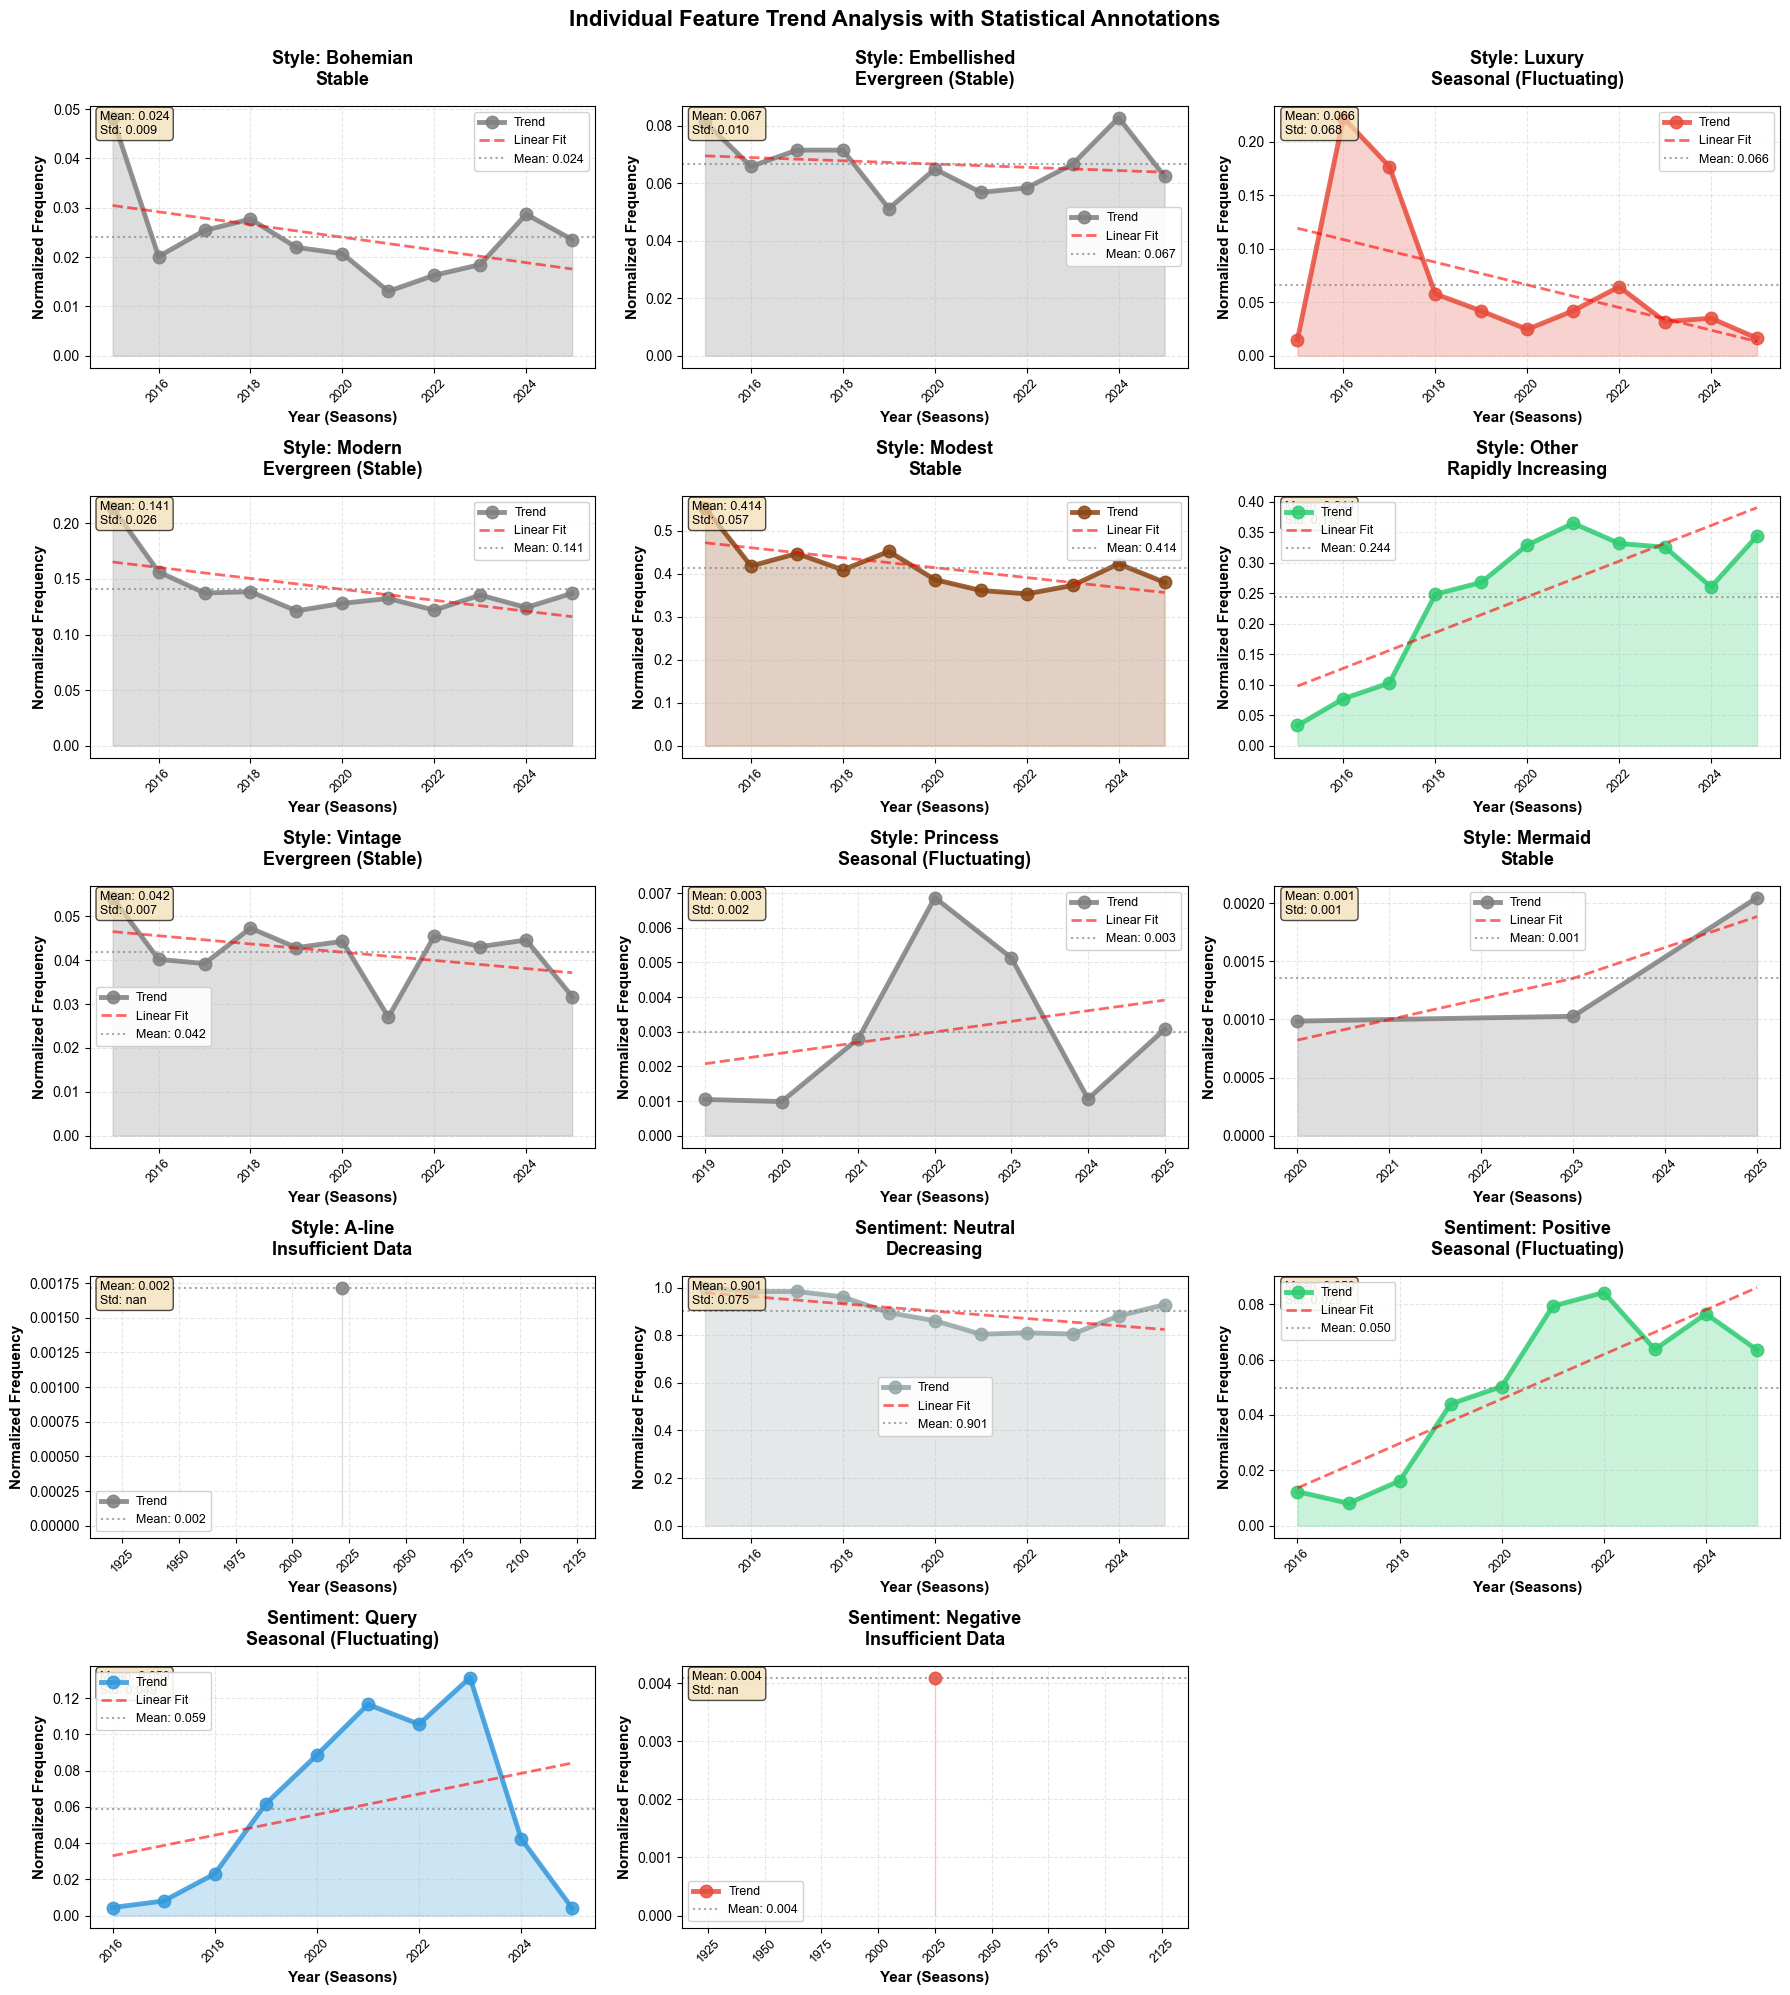

✅ Individual feature analysis completed!


In [25]:
# ============================================================================
# VISUALIZATION 3: Individual Feature Analysis with Statistical Annotations
# ============================================================================
# Creates detailed individual charts for each feature with statistics

print("\n🔍 Creating Individual Feature Analysis Charts...")

# Prepare all features to plot
all_features = []

# Add styles
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    all_features.append({
        'category': 'Style',
        'name': style.capitalize(),
        'data': style_data,
        'x_col': 'year',
        'y_col': 'frequency_normalized',
        'color': style_colors_viz.get(style, '#7f7f7f')
    })

# Add sentiments
for sentiment in sentiments:
    sent_data = sentiment_trend[sentiment_trend['comment_sentiment'] == sentiment].sort_values('year')
    all_features.append({
        'category': 'Sentiment',
        'name': sentiment.capitalize(),
        'data': sent_data,
        'x_col': 'year',
        'y_col': 'frequency_normalized',
        'color': sentiment_colors_viz.get(sentiment, '#7f7f7f')
    })

# Create grid of subplots
n_features = len(all_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(all_features):
    ax = axes[idx]
    data = feature['data']
    
    # Plot main trend line
    ax.plot(data[feature['x_col']], data[feature['y_col']], 
            marker='o', linewidth=3.5, markersize=9, 
            color=feature['color'], alpha=0.85, label='Trend')
    
    # Fill area under curve
    ax.fill_between(data[feature['x_col']], 0, data[feature['y_col']], 
                    alpha=0.25, color=feature['color'])
    
    # Add linear regression line
    if len(data) >= 2:
        x_vals = np.arange(len(data))
        z = np.polyfit(x_vals, data[feature['y_col']].values, 1)
        p = np.poly1d(z)
        ax.plot(data[feature['x_col']], p(x_vals), 
               linestyle='--', linewidth=2, color='red', alpha=0.6, label='Linear Fit')
    
    # Calculate statistics
    trend_type = classify_trend(data[feature['y_col']].values)
    mean_val = data[feature['y_col']].mean()
    std_val = data[feature['y_col']].std()
    
    # Add horizontal mean line
    ax.axhline(y=mean_val, color='gray', linestyle=':', linewidth=1.5, alpha=0.7, label=f'Mean: {mean_val:.3f}')
    
    # Styling
    ax.set_xlabel('Year (Seasons)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Normalized Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'{feature["category"]}: {feature["name"]}\n{trend_type}', 
                fontsize=13, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.9)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    
    # Add statistics box
    stats_text = f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Individual Feature Trend Analysis with Statistical Annotations', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Individual feature analysis completed!")


📊 Creating Comparative Analysis Dashboard...


C:\Users\Islam_Abdelmotalib\AppData\Local\Temp\ipykernel_5256\3395357791.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


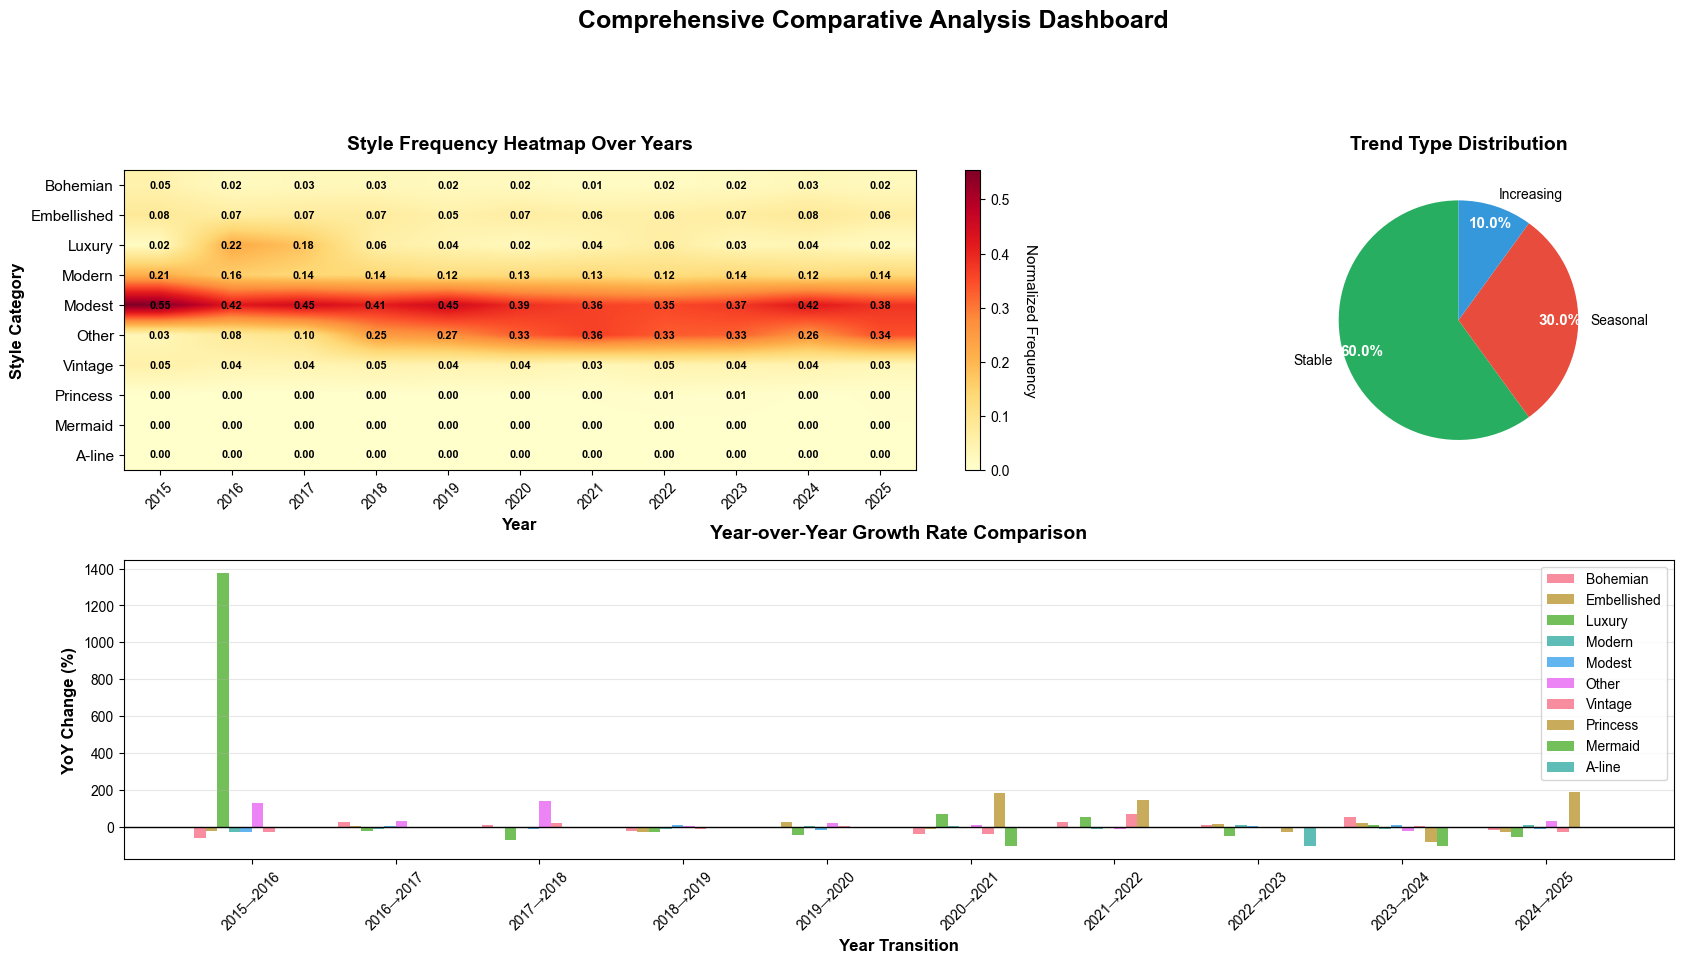


✅ All visualizations completed successfully!
📊 VISUALIZATION SUMMARY:
  ✓ Multi-panel time-series analysis
  ✓ Trend classification table
  ✓ Individual feature analysis with statistics
  ✓ Comparative heatmap & dashboard


In [31]:
# ============================================================================
# VISUALIZATION 4: Comparative Heatmap & Statistical Dashboard
# ============================================================================
# Creates advanced comparative visualizations

print("\n📊 Creating Comparative Analysis Dashboard...")

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# ========== 1. Trend Direction Heatmap ==========
ax1 = fig.add_subplot(gs[0, :2])

# Prepare heatmap data
all_years = sorted(style_trend['year'].unique())
heatmap_data = []
heatmap_labels = []

for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    # Create a full array for all years, filling missing years with 0
    year_to_freq = dict(zip(style_data['year'], style_data['frequency_normalized']))
    values = [year_to_freq.get(year, 0.0) for year in all_years]
    heatmap_data.append(values)
    heatmap_labels.append(f"{style.capitalize()}")

# Convert to numpy array
heatmap_data = np.array(heatmap_data)

# Create heatmap
im = ax1.imshow(heatmap_data, cmap='YlOrRd', aspect='auto', interpolation='bilinear')
ax1.set_yticks(range(len(heatmap_labels)))
ax1.set_yticklabels(heatmap_labels, fontsize=11)
ax1.set_xticks(range(len(style_trend['year'].unique())))
ax1.set_xticklabels([int(y) for y in sorted(style_trend['year'].unique())], rotation=45, fontsize=10)
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Style Category', fontsize=12, fontweight='bold')
ax1.set_title('Style Frequency Heatmap Over Years', fontsize=14, fontweight='bold', pad=15)

# Add colorbar
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Normalized Frequency', rotation=270, labelpad=20, fontsize=11)

# Add values on heatmap
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        text = ax1.text(j, i, f'{heatmap_data[i][j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8, fontweight='bold')

# ========== 2. Trend Classification Pie Chart ==========
ax2 = fig.add_subplot(gs[0, 2])

trend_types = []
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style]
    trend_type = classify_trend(style_data['frequency_normalized'].values)
    if 'Increasing' in trend_type:
        trend_types.append('Increasing')
    elif 'Decreasing' in trend_type:
        trend_types.append('Decreasing')
    elif 'Stable' in trend_type or 'Evergreen' in trend_type:
        trend_types.append('Stable')
    else:
        trend_types.append('Seasonal')

trend_counts = pd.Series(trend_types).value_counts()
colors_pie = ['#27ae60', '#e74c3c', '#3498db', '#f39c12']

wedges, texts, autotexts = ax2.pie(trend_counts.values, labels=trend_counts.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors_pie[:len(trend_counts)],
                                     pctdistance=0.85)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

ax2.set_title('Trend Type Distribution', fontsize=14, fontweight='bold', pad=15)

# ========== 3. Year-over-Year Change Matrix ==========
ax3 = fig.add_subplot(gs[1, :])

# Calculate YoY changes for each style
years_list = sorted(style_trend['year'].unique())
num_transitions = len(years_list) - 1

yoy_data = []
for style in styles:
    style_data = style_trend[style_trend['dress_style_category'] == style].sort_values('year')
    
    # Create a full year series with all years
    year_to_freq = dict(zip(style_data['year'], style_data['frequency_normalized']))
    full_values = [year_to_freq.get(year, 0.0) for year in years_list]
    
    # Calculate YoY changes
    changes = []
    for i in range(1, len(full_values)):
        if full_values[i-1] == 0:
            changes.append(0)
        else:
            pct_change = ((full_values[i] - full_values[i-1]) / full_values[i-1]) * 100
            changes.append(pct_change)
    
    yoy_data.append(changes)

if yoy_data:
    # Plot as grouped bar chart
    x_pos = np.arange(num_transitions)
    width = 0.8 / len(styles)  # Dynamic width based on number of styles
    
    for idx, (style, data) in enumerate(zip(styles, yoy_data)):
        ax3.bar(x_pos + idx * width, data, width, 
               label=style.capitalize(), alpha=0.8)
    
    ax3.set_xlabel('Year Transition', fontsize=12, fontweight='bold')
    ax3.set_ylabel('YoY Change (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Year-over-Year Growth Rate Comparison', fontsize=14, fontweight='bold', pad=15)
    ax3.set_xticks(x_pos + width * (len(styles) - 1) / 2)
    ax3.set_xticklabels([f'{int(years_list[i])}→{int(years_list[i+1])}' 
                         for i in range(num_transitions)], rotation=45)
    ax3.legend(fontsize=10)
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax3.grid(axis='y', alpha=0.3)

# ========== 4. Statistical Summary Table ==========
# ax4 = fig.add_subplot(gs[2, :])
# ax4.axis('off')

# # Create summary statistics table
# table_data = []
# table_data.append(['Category', 'Feature', 'Mean', 'Std', 'Min', 'Max', 'Trend'])

# for style in styles:
#     style_data = style_trend[style_trend['dress_style_category'] == style]
#     vals = style_data['frequency_normalized'].values
#     trend_type = classify_trend(vals)
    
#     table_data.append([
#         'Style',
#         style.capitalize(),
#         f'{vals.mean():.3f}',
#         f'{vals.std():.3f}',
#         f'{vals.min():.3f}',
#         f'{vals.max():.3f}',
#         trend_type[:15] + '...' if len(trend_type) > 15 else trend_type
#     ])

# # Create table
# table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
#                  colWidths=[0.12, 0.15, 0.12, 0.12, 0.12, 0.12, 0.25])
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1, 2.5)

# # Style header row
# for i in range(len(table_data[0])):
#     cell = table[(0, i)]
#     cell.set_facecolor('#34495e')
#     cell.set_text_props(weight='bold', color='white', fontsize=11)

# # Alternate row colors
# for i in range(1, len(table_data)):
#     for j in range(len(table_data[0])):
#         cell = table[(i, j)]
#         if i % 2 == 0:
#             cell.set_facecolor('#ecf0f1')
#         else:
#             cell.set_facecolor('white')

# ax4.set_title('Statistical Summary Table', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Comprehensive Comparative Analysis Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n✅ All visualizations completed successfully!")
print("="*100)
print("📊 VISUALIZATION SUMMARY:")
print("  ✓ Multi-panel time-series analysis")
print("  ✓ Trend classification table")
print("  ✓ Individual feature analysis with statistics")
print("  ✓ Comparative heatmap & dashboard")
print("="*100)